# Import

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from math import sqrt
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import time
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import numpy as np
import random
from sklearn import preprocessing
import re
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import torch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization, Conv1D
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import StandardScaler
import random
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import time
from matplotlib import ticker
import pandas_profiling as pp

# Data Cleaning

In [ ]:
data_name="6Stove.csv"
path="/content/drive/MyDrive/Colab Notebooks"
index_col="Time"
full_path=os.path.join(path,data_name)

In [ ]:
print("Your path is: ",full_path)

Your path is:  /content/drive/MyDrive/Colab Notebooks/6Stove.csv


In [ ]:
data=pd.read_csv(full_path,index_col=index_col)
data.head()

,6#一次风机电机电流（额定16.9A）,6#一次风机电机频率反馈,6#一次风机高压柜有功脉冲,6#实际给料量,6#干燥炉排一段下漏渣溜管A温度,6#干燥炉排一段下漏渣溜管B温度,6#干燥炉排一段入口空气流量,6#干燥炉排二段下漏渣溜管A温度,6#干燥炉排二段下漏渣溜管B温度,6#干燥炉排二段下漏渣溜管C温度,6#干燥炉排二段入口空气流量,6#干燥炉排第二段A垃圾层压差,6#干燥炉排第二段B垃圾层压差,6#干燥炉排第二段C垃圾层压差,6#炉SCR反应器旁路挡板门开度反馈,6#炉一次风机出口压力,6#炉一次风机电动风门位置反馈,6#炉一次风机进口压力,6#炉一次风机进口流量,6#炉一次风机进口温度,6#炉一次风空预器出口压力,6#炉一次风空预器出口温度,6#炉主给水电动调节门位置反馈,6#炉主蒸汽压力,6#炉主蒸汽流量,6#炉主蒸汽温度,6#炉二次风机入口电动调节门位置反馈,6#炉二次风机压力,6#炉二次风机温度,6#炉二次风机电动机频率反馈,6#炉二次风机电动调节门（前壁侧）,6#炉二次风机电机电流（额定201A）,6#炉二次风流量,6#炉二次风电动调节门（后壁侧）,6#炉右一级减温器出口温度,6#炉右一级减温水电动调节门位置反馈,6#炉右二级减温器出口温度,6#炉右二级减温水电动调节门位置反馈,6#炉启排气动调节门位置反馈,6#炉启排气动隔绝门位置反馈,...,6#焚烧炉膛右温度,6#焚烧炉膛左温度,6#焚烧炉顶部前温度,6#焚烧炉顶部右温度,6#焚烧炉顶部左温度,6#燃烧炉排一段下漏渣溜管A温度,6#燃烧炉排一段下漏渣溜管B温度,6#燃烧炉排一段下漏渣溜管C温度,6#燃烧炉排上部右温度,6#燃烧炉排上部左温度,6#燃烧炉排第一段A垃圾层压,6#燃烧炉排第一段B垃圾层压,6#燃烧炉排第一段C垃圾层压,6#燃烧炉排第三段A垃圾层压,6#燃烧炉排第三段B垃圾层压,6#燃烧炉排第三段C垃圾层压,6#燃烧炉排第二段A垃圾层压,6#燃烧炉排第二段B垃圾层压,6#燃烧炉排第二段C垃圾层压,6#线回喷流量,6#落差段引风机电流（额定21.5A）,6#锅炉右1级减温水流量,6#锅炉右2级减温水流量,6#锅炉左1级减温水流量,6#锅炉左2级减温水流量,6#锅炉烟气在线分析仪一氧化碳,6#锅炉烟气在线分析仪二氧化硫,6#锅炉烟气在线分析仪压力,6#锅炉烟气在线分析仪氢氟酸,6#锅炉烟气在线分析仪氨气,6#锅炉烟气在线分析仪氮氧化物,6#锅炉烟气在线分析仪氯化氢,6#锅炉烟气在线分析仪水含量,6#锅炉烟气在线分析仪流速,6#锅炉烟气在线分析仪温度,6#锅炉烟气在线分析仪烟气浓度,6#锅炉给水压力,6#锅炉给水流量,6#锅炉给水温度,6#预计焚烧量
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-07-21 19:22:31,5.925000,60.178238,50.581020,171.25461,144.40920,142.73804,2.216420,167.42451,170.98668,172.65578,3.413172,202.96297,256.20370,248.56480,100.0,2.363195,99.96990,-0.051574,42.690150,35.572052,2.002083,222.75665,48.263890,3.884259,45.175070,394.98108,99.31713,-0.046667,39.968903,10.872685,9.384259,-10.05,4.122664,9.995370,255.61795,27.180555,258.06550,-0.023148,1.988426,-0.034722,...,1034.4393,1001.21796,940.5143,922.99866,902.86820,182.42920,190.60437,184.93756,1108.6360,1058.4716,644.25930,746.75920,590.0926,292.54630,317.36110,307.26852,525.37036,515.13885,421.62036,0.0,14.406990,1.271374,1.683540,1.196589,1.834031,8.347222,7.486111,-0.321296,0.510995,-2.5,175.23148,9.729167,26.375000,8.721296,127.48611,0.805556,6.715556,44.072120,131.83376,406.3584
2021-07-21 19:22:41,5.872222,60.178238,50.574078,171.25461,144.50208,142.83084,2.216543,167.61375,170.98668,172.37240,3.410121,224.90741,282.08334,272.59260,100.0,2.359259,99.96065,-0.052361,42.548943,35.572052,2.006250,222.71556,48.270832,3.883565,45.123830,394.98108,99.31713,-0.051389,39.968903,10.863425,9.391204,-10.05,4.067056,10.027779,255.89342,27.180555,258.43246,-0.020833,2.032407,-0.034722,...,1034.2452,1001.21796,940.4196,922.62225,902.58710,182.52327,190.79204,185.12561,1108.3376,1059.9391,637.68520,733.75000,576.1574,295.23150,314.39813,299.12036,524.39813,512.03705,416.94446,0.0,14.404005,1.271519,1.681988,1.215082,1.834958,8.305555,7.623611,-0.324537,0.510995,-2.5,174.50926,9.718750,26.375000,8.749074,127.48611,0.762732,6.712963,44.159450,131.83376,406.3584
2021-07-21 19:22:51,5.897222,60.201390,50.534725,171.25461,144.50208,143.10928,2.210699,167.61375,170.98668,172.18347,3.393714,219.76852,277.87036,269.90740,100.0,2.360880,99.96065,-0.051157,42.595158,35.572052,1.999074,222.67447,48.263890,3.882870,45.107662,394.80338,99.31713,-0.044306,39.968903,10.833333,9.377315,-10.05,4.075815,10.034722,255.89342,27.273148,258.24896,-0.023148,1.995370,-0.034722,...,1033.9540,1001.50630,940.0731,921.99475,902.05610,182.52327,190.79204,185.12561,1108.1387,1062.2556,633.28700,729.67596,566.5741,290.97223,310.46295,293.47223,494.62960,466.89813,367.73148,0.0,14.404005,1.271035,1.678345,1.214043,1.835028,8.736112,7.623611,-0.329167,0.510995,-2.5,173.73148,9.798612,26.347221,8.906481,127.43750,0.872685,6.711852,44.281490,131.83376,406.3584
2021-07-21 19:23:01,5.737037,60.210644,50.574078,171.25461,144.50208,143.29494,2.211831,167.80304,170.79765,172.12051,3.389272,224.12036,281.75928,273.05554,100.0,2.367130,99.96759,-0.052708,42.538060,35.572052,2.007176,222.63339,48.270832,3.884259,45.050293,394.53683,99.31713,-0.043472,39.968903,10.833333,9.384259,-10.05,4.058075,10.064815,256.07703,27.266205,257.88202,-0.023148,1.974537,-0.027778,...,1033.8570,1001.41016,939.6950

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas_profiling
import pandas as pd
import pandas_profiling as pp

In [ ]:
data_list = list(data.columns)

In [ ]:
new_data_list = list(filter(lambda x: re.search(r'(.*)氨(.*?).*', x) != None, data_list))  # 生成新列表
new_data_list

['6#炉氨水总流量', '6#锅炉烟气在线分析仪氨气']

In [ ]:
list(filter(lambda x: re.search(r'(.*)氮氧(.*?).*', x) != None, data_list))  

['6#锅炉烟气在线分析仪氮氧化物']

In [ ]:
data['6#炉排烟NOx小时实时均值'].describe()

count    17047.000000
mean       154.748684
std          7.686472
min        137.083650
25%        150.466285
50%        154.037320
75%        160.100955
max        182.017410
Name: 6#炉排烟NOx小时实时均值, dtype: float64

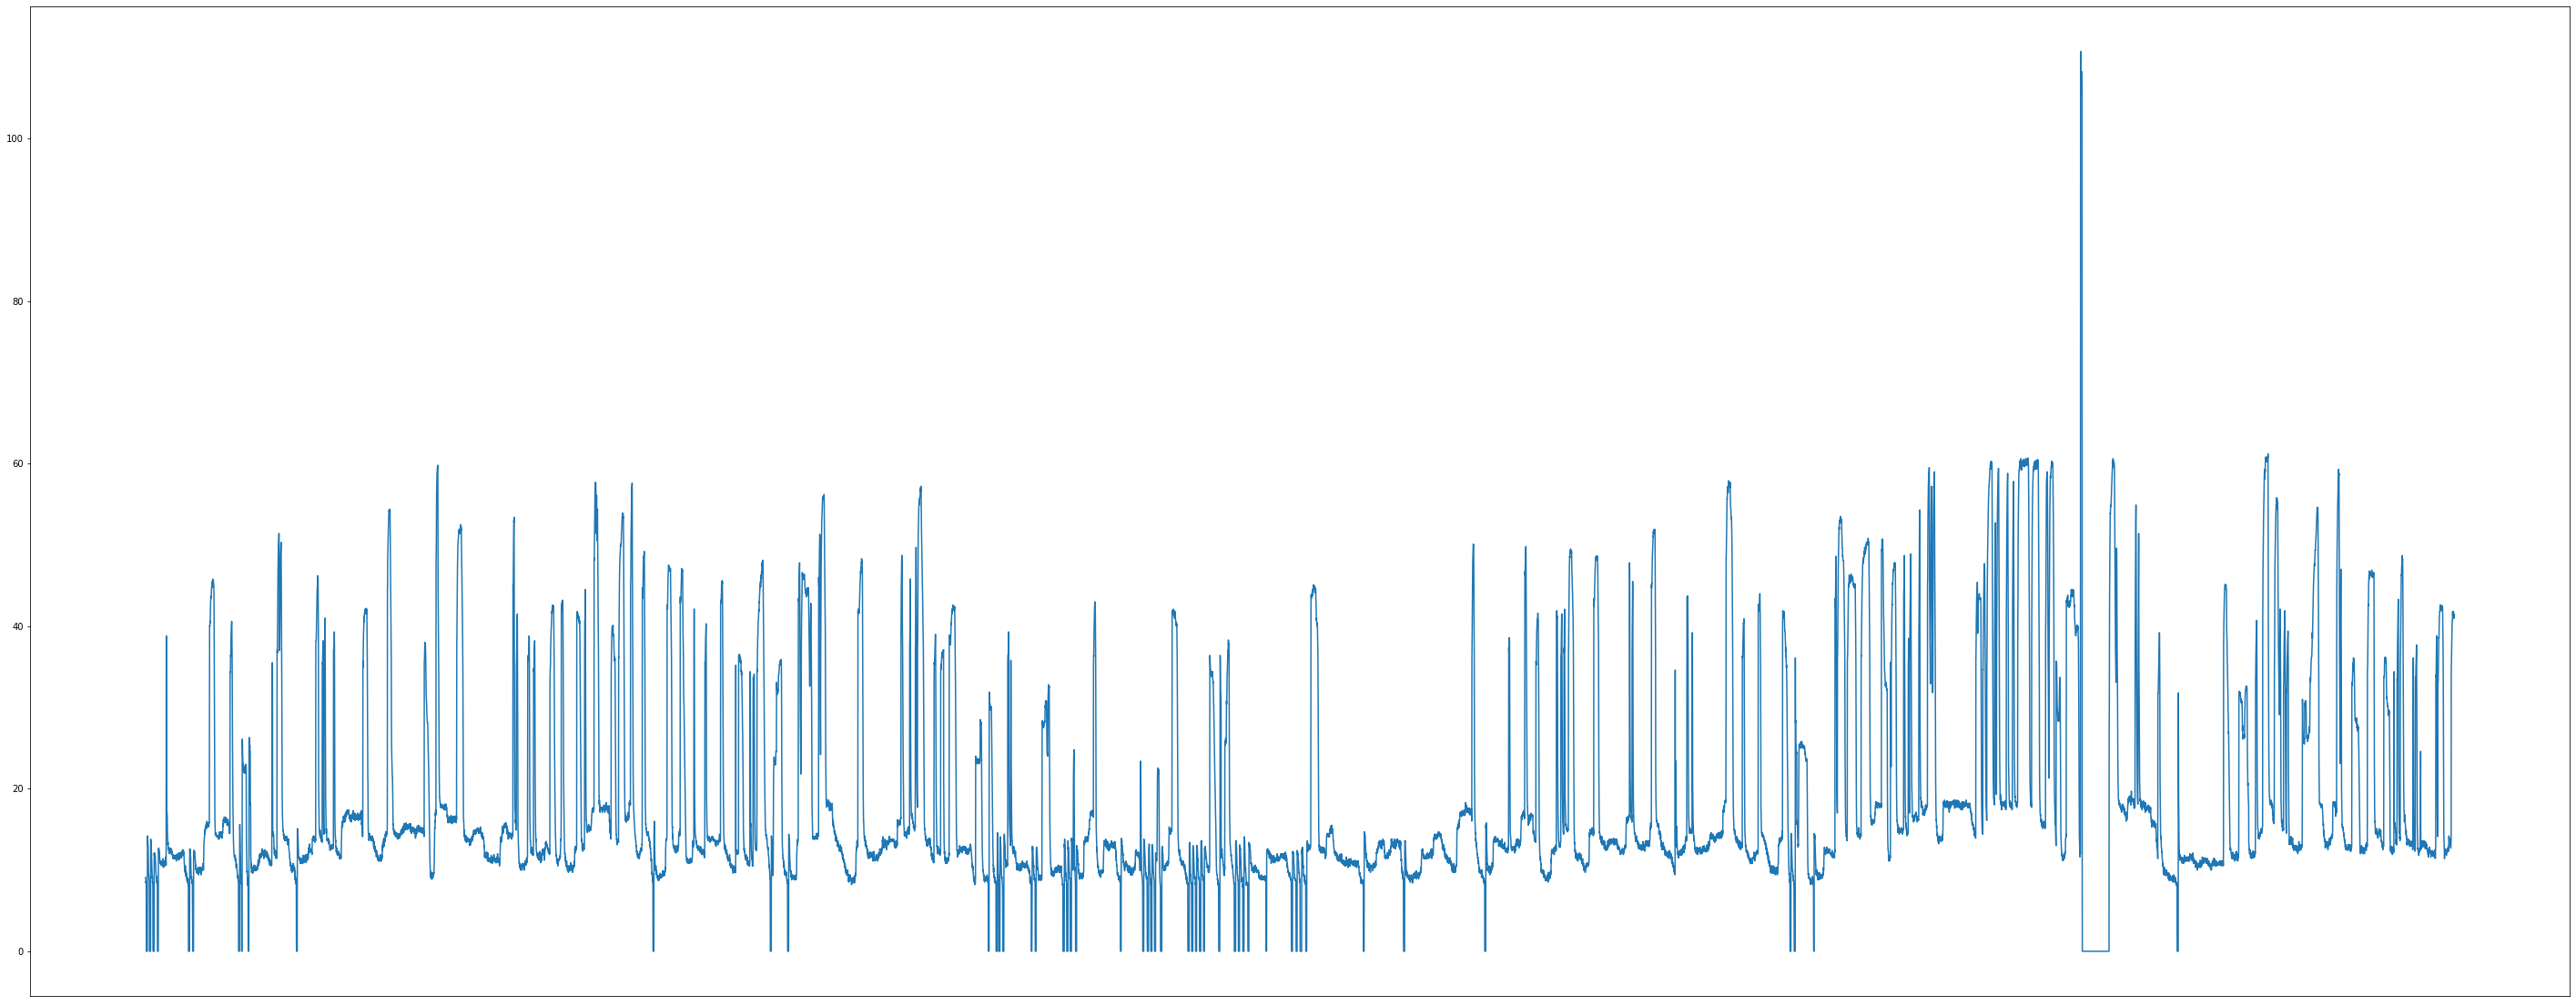

In [ ]:
plt.figure(figsize=(50,20))
plt.plot(data['6#炉氨水总流量'])
plt.xticks([])
plt.show()

In [ ]:
data['6#锅炉烟气在线分析仪氮氧化物'].describe()

count    17047.000000
mean       201.755620
std         23.374488
min         -0.370370
25%        187.148145
50%        201.722210
75%        216.648150
max        287.444460
Name: 6#锅炉烟气在线分析仪氮氧化物, dtype: float64

In [ ]:
data['6#锅炉烟气在线分析仪氨气'].describe()

count    17047.0
mean        -2.5
std          0.0
min         -2.5
25%         -2.5
50%         -2.5
75%         -2.5
max         -2.5
Name: 6#锅炉烟气在线分析仪氨气, dtype: float64

In [ ]:
data_list.index('6#炉氨水总流量')

77

In [ ]:
data[data['6#炉排烟NOx小时实时均值']>150].iloc[:,data_list.index('6#炉氨水总流量')].describe()

count    13250.000000
mean        19.967592
std         14.156927
min          0.000000
25%         11.600000
50%         14.100000
75%         23.600000
max        110.700000
Name: 6#炉氨水总流量, dtype: float64

把NOx排出浓度设为target放在第一列

In [ ]:
target="6#炉排烟NOx小时实时均值"
target_data=data[target]
data.drop(labels=target, axis=1,inplace=True)
data.insert(0,target,target_data)

take a look at the data!

In [ ]:
data.describe()

,6#炉排烟NOx小时实时均值,6#一次风机电机电流（额定16.9A）,6#一次风机电机频率反馈,6#一次风机高压柜有功脉冲,6#实际给料量,6#干燥炉排一段下漏渣溜管A温度,6#干燥炉排一段下漏渣溜管B温度,6#干燥炉排一段入口空气流量,6#干燥炉排二段下漏渣溜管A温度,6#干燥炉排二段下漏渣溜管B温度,6#干燥炉排二段下漏渣溜管C温度,6#干燥炉排二段入口空气流量,6#干燥炉排第二段A垃圾层压差,6#干燥炉排第二段B垃圾层压差,6#干燥炉排第二段C垃圾层压差,6#炉SCR反应器旁路挡板门开度反馈,6#炉一次风机出口压力,6#炉一次风机电动风门位置反馈,6#炉一次风机进口压力,6#炉一次风机进口流量,6#炉一次风机进口温度,6#炉一次风空预器出口压力,6#炉一次风空预器出口温度,6#炉主给水电动调节门位置反馈,6#炉主蒸汽压力,6#炉主蒸汽流量,6#炉主蒸汽温度,6#炉二次风机入口电动调节门位置反馈,6#炉二次风机压力,6#炉二次风机温度,6#炉二次风机电动机频率反馈,6#炉二次风机电动调节门（前壁侧）,6#炉二次风机电机电流（额定201A）,6#炉二次风流量,6#炉二次风电动调节门（后壁侧）,6#炉右一级减温器出口温度,6#炉右一级减温水电动调节门位置反馈,6#炉右二级减温器出口温度,6#炉右二级减温水电动调节门位置反馈,6#炉启排气动调节门位置反馈,...,6#焚烧炉膛右温度,6#焚烧炉膛左温度,6#焚烧炉顶部前温度,6#焚烧炉顶部右温度,6#焚烧炉顶部左温度,6#燃烧炉排一段下漏渣溜管A温度,6#燃烧炉排一段下漏渣溜管B温度,6#燃烧炉排一段下漏渣溜管C温度,6#燃烧炉排上部右温度,6#燃烧炉排上部左温度,6#燃烧炉排第一段A垃圾层压,6#燃烧炉排第一段B垃圾层压,6#燃烧炉排第一段C垃圾层压,6#燃烧炉排第三段A垃圾层压,6#燃烧炉排第三段B垃圾层压,6#燃烧炉排第三段C垃圾层压,6#燃烧炉排第二段A垃圾层压,6#燃烧炉排第二段B垃圾层压,6#燃烧炉排第二段C垃圾层压,6#线回喷流量,6#落差段引风机电流（额定21.5A）,6#锅炉右1级减温水流量,6#锅炉右2级减温水流量,6#锅炉左1级减温水流量,6#锅炉左2级减温水流量,6#锅炉烟气在线分析仪一氧化碳,6#锅炉烟气在线分析仪二氧化硫,6#锅炉烟气在线分析仪压力,6#锅炉烟气在线分析仪氢氟酸,6#锅炉烟气在线分析仪氨气,6#锅炉烟气在线分析仪氮氧化物,6#锅炉烟气在线分析仪氯化氢,6#锅炉烟气在线分析仪水含量,6#锅炉烟气在线分析仪流速,6#锅炉烟气在线分析仪温度,6#锅炉烟气在线分析仪烟气浓度,6#锅炉给水压力,6#锅炉给水流量,6#锅炉给水温度,6#预计焚烧量
count,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,1.704700e+04,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,...,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.0,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.0,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000
mean,154.748684,5.903162,60.762583,50.581189,194.127052,139.420999,138.368739,2.306870,164.912675,170.444405,169.539887,3.462292,280.357008,305.912763,293.717510,99.999707,2.376299,99.969073,-0.050229,43.975103,34.675768,1.999901,222.305269,48.769893,3.883511,45.836838,396.398348,99.322613,0.086033,39.848711,17.118080,10.351152,-1.005000e+01,4.761690,10.667785,263.948590,28.097046,269.937857,60.327351,1.995325,...,1048.855356,1000.921979,958.593444,954.926461,914.401052,182.926071,190.263020,185.333227,1051.207749,1058.223186,653.241116,753.368212,666.524359,346.919989,382.426171,351.493067,500.982316,533.615494,493.307739,0.0,14.405190,1.340014,1.700050,1.276911,1.940487,1.072477,11.084261,-0.314223,0.572248,-2.5,201.755620,10.006069,26.748659,8.565741,127.068532,0.819409,6.711332,44.759248,131.728361,401.618289
std,7.686472,0.209563,1.369491,0.047302,110.710512,7.101254,7.113002,0.083817,4.309940,1.767330,6.564746,0.117954,45.481932,40.770975,40.561814,0.038295,0.034175,0.009938,0.014863,2.904903,0.369343,0.010315,2.637593,1.378051,0.005030,1.751510,7.902644,0.006728,0.185963,0.728133,7.704508,4.516572,1.165324e-12,1.170755,4.516961,10.809936,6.140913,14.235077,48.333848,0.029848,...,21.459636,14.954537,16.027225,20.084910,16.167257,1.414754,1.858191,1.543136,58.243872,57.558445,124.517890,133.339498,119.275625,62.033604,68.690081,62.686597,92.533644,90.515205,86.396635,0.0,0.019015,0.289649,0.166266,0.327558,0.107971,16.255613,5.602786,0.015068,0.133529,0.0,23.374488,1.548653,1.677951,1.241746,1.601210,0.518713,0.010479,2.596825,0.169884,26.569392
min,137.083650,5.395370,58.071754,50.462960,0.000000,121.476585,115.460520,2.135626,146.670410,166.213670,106.371850,3.313710,149.212950,183.796300,182.268510,95.000000,2.287963,99.937500,-0.097847,37.080944,33.943840,1.895602,215.220030,43.967594,3

### Null Value

In [ ]:
data.isnull().sum().sort_values(ascending=False).head(10)

6#预计焚烧量           0
6#炉引风机进口烟气温度      0
6#炉汽包压力1          0
6#炉汇汽集箱压力         0
6#炉氨水总流量          0
6#炉氧量小时均值_时       0
6#炉料落渣管冷却回水温度B    0
6#炉料落渣管冷却回水温度A    0
6#炉排烟粉尘小时实时均值     0
6#炉排烟SO2小时实时均值    0
dtype: int64

无缺失值

### Data Variation

In [ ]:
data_std=data.std().sort_values(ascending=True)
data_std=data_std.reset_index()
data_std.columns=['feature','std']
data_std.head()

,feature,std
0,6#炉辅助燃烧器天然气流量和,0.0
1,6#锅炉烟气在线分析仪氨气,0.0
2,6#炉辅助燃烧器B 天然气流量,0.0
3,6#炉液压泵B电流（额定138A）,0.0
4,6#炉辅助燃烧器A 天然气流量,0.0


In [ ]:
drop_columns=[]

for index, row in data_std.iterrows():
  if row["std"]<0.001:
    drop_columns.append(row["feature"])

lose_data=data[drop_columns]
data.drop(labels=drop_columns, axis=1,inplace=True)

删掉累计值

In [ ]:
list(filter(lambda x: re.search(r'(.*)累(.*?).*', x) != None, data_list))  

['6#炉活性炭流量累计']

In [ ]:
data = data.drop('6#炉活性炭流量累计', axis=1)

生成回归用数据集

In [ ]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/regression.csv')

In [ ]:
data.describe()

,NOx反应值,6#炉氨水总流量,6#焚烧炉膛前温度,6#炉白班主汽流量,6#炉排烟CO小时实时均值,6#炉夜班主汽流量,6#实际给料量,6#炉排烟SO2小时实时均值,6#焚烧炉膛左温度,6#炉省煤器灰斗出口烟气温度,6#锅炉烟气在线分析仪一氧化碳,6#炉汽包压力2,6#炉汽包压力1,6#炉炉落差段冷却风温度,6#炉排烟HCL小时实时均值,6#干燥炉排一段下漏渣溜管A温度,6#炉左一级减温水电动调节门位置反馈,6#锅炉右1级减温水流量,6#炉炉膛温度平均值,6#焚烧炉顶部前温度,6#焚烧炉膛右温度,6#焚烧炉入口部前烟气温度,6#炉粉尘折算小时均值,6#炉主蒸汽流量,6#炉右二级减温器出口温度,6#预计焚烧量,6#焚烧炉第二飞灰斗右温度,6#炉粉尘折算日均值,6#焚烧炉第一飞灰斗左温度,6#焚烧炉第四飞灰斗右温度,6#炉排烟粉尘小时实时均值,6#炉省煤器出口烟温度,6#炉左二级减温器出口温度,6#焚烧炉第二飞灰斗左温度,6#锅炉右2级减温水流量,6#炉燃烧炉排二段入口空气流量,6#炉干燥炉排二段A入口风门,6#炉右一级减温水电动调节门位置反馈,6#炉汇汽集箱压力,6#炉炉排风量总汇,...,6#炉燃烧炉排二段C入口空气流量,6#炉燃烧炉排三段C入口空气流量,6#炉燃烧炉排三段B入口空气流量,6#炉燃烧炉排一段B入口空气流量,6#炉主蒸汽温度,6#炉燃烧炉排二段B入口风门,6#炉主给水电动调节门位置反馈,6#锅炉左2级减温水流量,6#炉燃烧炉排一段入口空气流量,6#炉燃烧炉排三段B入口风门,6#炉干燥炉排二段C入口空气流量,6#炉燃烧炉排一段C入口风门,6#炉干燥炉排一段C入口空气流量,6#炉燃烧炉排三段C入口风门,6#焚烧炉第三飞灰斗右温度,6#炉干燥炉排二段A入口空气流量,6#炉燃尽炉炉排一段C入口风门,6#炉干燥炉排上部左温度,6#锅炉给水流量,6#炉二次风机温度,6#炉燃烧炉排一段C入口空气流量,6#焚烧炉第三飞灰斗左温度,6#干燥炉排一段入口空气流量,6#干燥炉排二段入口空气流量,6#炉燃烧炉排一段B入口风门,6#炉一次风机进口流量,6#炉燃尽炉炉排一段A入口空气流量,6#炉燃烧炉排三段A入口风门,6#炉辅助燃烧器A 天然气压力,6#焚烧炉顶部右温度,6#炉干燥炉排二段B入口空气流量,6#炉干燥炉排二段B入口风门,6#炉燃尽炉炉排一段A入口风门,6#炉辅助燃烧器B 天然气压力,6#炉烟气流量（干）,6#炉燃烧炉排二段A入口风门,6#炉省煤器出口氧含量,6#炉燃尽炉炉排一段B入口风门,6#炉二次风机电动机频率反馈,6#炉省煤器出口烟压力
count,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,...,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000
mean,47.100525,0.169433,0.439034,0.735088,0.060369,0.236823,0.484148,0.253480,0.451852,0.525417,0.003526,0.342399,0.341506,0.558375,0.423480,0.635158,0.500263,0.511183,0.454685,0.417458,0.489182,0.449629,0.344291,0.304768,0.287651,0.589254,0.198971,0.472774,0.462756,0.195917,0.334428,0.504780,0.187676,0.194579,0.666030,0.487734,0.557476,0.453659,0.596393,0.448594,...,0.484332,0.492950,0.498661,0.497512,0.620602,0.474490,0.355860,0.168437,0.489656,0.453003,0.303857,0.410768,0.335612,0.395411,0.309746,0.607922,0.316157,0.484693,0.301532,0.347093,0.481839,0.356329,0.335726,0.264506,0.442867,0.429358,0.487607,0.400729,0.875105,0.409048,0.332813,0.319926,0.484060,0.983577,0.322685,0.426380,0.343371,0.304193,0.147131,0.729561
std,20.084120,0.120351,0.242497,0.300927,0.123126,0.312342,0.276489,0.189557,0.217063,0.210374,0.027167,0.195486,0.195017,0.204620,0.207282,0.251818,0.121094,0.110665,0.141225,0.149492,0.170391,0.141994,0.223923,0.177436,0.246087,0.133871,0.220733,0.243292,0.139575,0.237952,0.163326,0.200386,0.246749,0.192354,0.065007,0.192966,0.145976,0.122500,0.076999,0.181210,...,0.193581,0.189121,0.184030,0.199307,0.163023,0.190887,0.102154,0.148133,0.205232,0.193616,0.132819,0.200002,0.164067,0.189079,0.150672,0.133805,0.137682,0.207299,0.107473,0.208401,0.207337,0.164268,0.164431,0.210348,0.192658,0.181226,0.138335,0.201115,0.131323,0.150513,0.194965,0.179752,0.152031,0.110881,0.075911,0.206573,0.104818,0.125889,0.154098,0.105463
min,-28.436160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0

## Visualization

In [ ]:
print(plt.rcParams["font.family"])
print(plt.rcParams['font.sans-serif'])

['sans-serif']
['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']


Text(0, 0.5, '')

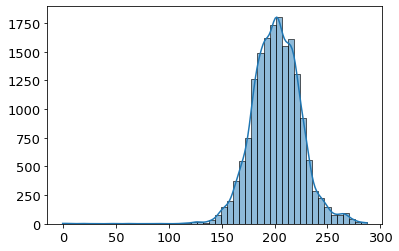

In [ ]:
sns.histplot(data['6#锅炉烟气在线分析仪氮氧化物'],kde = True, bins = 50)

# 修改刻度值大小
plt.tick_params(labelsize=13)
# 添加x, y轴描述信息
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

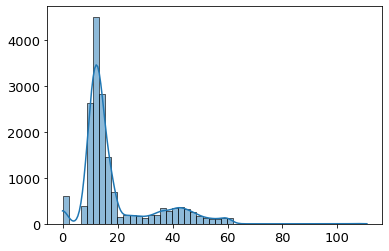

In [ ]:
sns.histplot(data['6#炉氨水总流量'],kde = True, bins = 50)

# 修改刻度值大小
plt.tick_params(labelsize=13)
# 添加x, y轴描述信息
plt.xlabel("")
plt.ylabel("")

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIC_0.15_regression.csv',index_col='Time')
plt.figure(figsize=(20,6))
plt.plot(np.arange(0,3000,1),list(data['6#炉氨水总流量'][4000:7000]),label='NH3 Flow',color='black')
plt.plot(np.arange(0,3000,1),list(data.iloc[4000:7000,0]),color='grey',linestyle='dashed',label='NOx Reduction')
plt.legend(fontsize=12)
plt.tick_params(axis='both',labelsize=13)
# plt.xticks([])
plt.xlabel('Sample Sequence',fontsize=20)
plt.ylabel('Concentration mg/m3',fontsize=20)
plt.savefig('sample.pdf')

In [ ]:
data['6#炉氨水总流量']

Time
2021-07-21 19:23:21    0.000000
2021-07-21 19:23:31    0.000000
2021-07-21 19:23:41    0.000000
2021-07-21 19:23:51    0.000000
2021-07-21 19:24:01    0.000000
                         ...   
2021-07-23 23:49:11    0.110208
2021-07-23 23:49:20    0.111111
2021-07-23 23:49:40    0.110208
2021-07-23 23:49:50    0.112918
2021-07-23 23:50:00    0.113821
Name: 6#炉氨水总流量, Length: 16992, dtype: float64

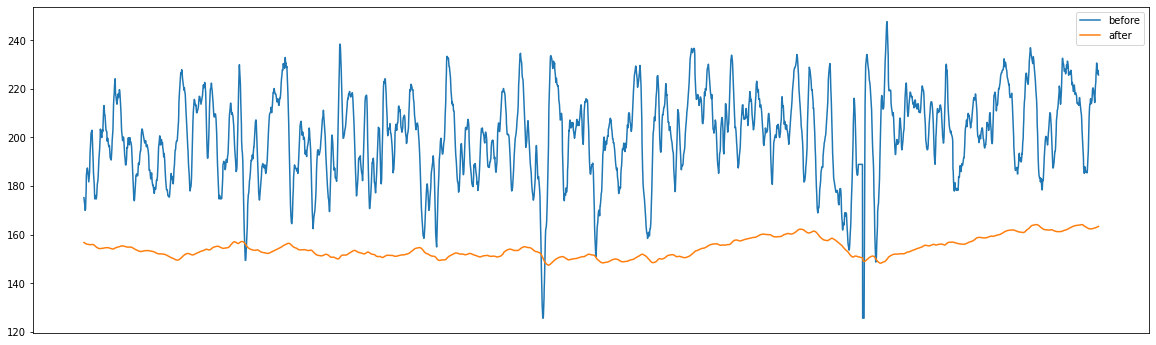

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(data['6#锅炉烟气在线分析仪氮氧化物'][:5000],label='before')
plt.plot(data['6#炉排烟NOx小时实时均值'][:5000],label='after')
plt.legend()
plt.xticks([])
plt.show()

## Replace outliers

In [ ]:
quantile_below = data['6#锅炉烟气在线分析仪氮氧化物'].quantile(0.0027)
for i,j in enumerate(data['6#锅炉烟气在线分析仪氮氧化物']):
  if j < quantile_below:
    data['6#锅炉烟气在线分析仪氮氧化物'][i] = quantile_below

Text(0, 0.5, '')

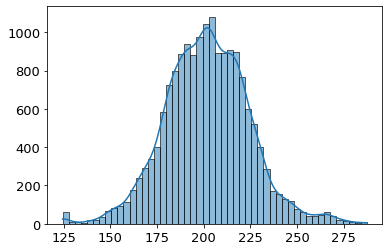

In [ ]:
sns.histplot(data['6#锅炉烟气在线分析仪氮氧化物'],kde = True, bins = 50)

# 修改刻度值大小
plt.tick_params(labelsize=13)
# 添加x, y轴描述信息
plt.xlabel("")
plt.ylabel("")

## 计算Before和After的最佳延迟

In [ ]:
mine = MINE(alpha=0.6, c=15)

In [ ]:
result=[]
for i in range(1,21):
  mine.compute_score(data['6#炉氨水总流量'][:10000],data['6#锅炉烟气在线分析仪氮氧化物'].shift(i)[:10000]-data['6#炉排烟NOx小时实时均值'][:10000])
  result.append(mine.mic())

In [ ]:
result=[0.2805921193218252,
 0.29463848987095104,
 0.3029965048558745,
 0.30616804058224034,
 0.3074131553255465,
 0.3023613907481286,
 0.29605918292357675,
 0.2859378846061611,
 0.2739862335848382,
 0.26001282202992343,
 0.2459926304534609,
 0.23093478850634827,
 0.21911978048247696,
 0.21134274932532515,
 0.20471909579579087,
 0.20030799517517764,
 0.19629631455254823,
 0.19017646630690568,
 0.18701179516453237,
 0.17872126588688372]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

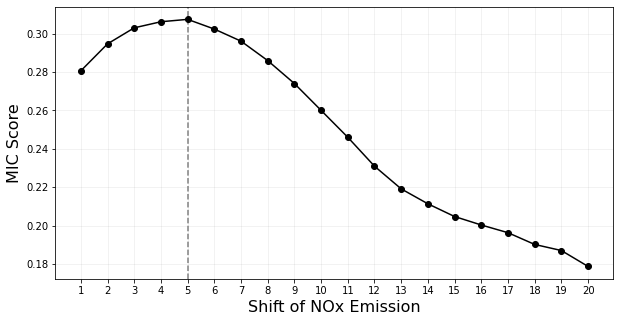

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,5))
plt.grid(axis='both',color='grey',linestyle='-',lw=1,alpha=0.1)
# title = ('MIC Score with Shift in NOx Emission')
# plt.title(title, fontsize=18)
plt.axvline(5.02,c='grey',linestyle='dashed')
ax1.set_xlabel('Shift of NOx Emission', fontsize=16)
ax1.set_ylabel('MIC Score', fontsize=16)
# ax1.vlines(32,0.12,0.28,color="black",linestyles='dotted',label='max')
# ax1.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)
# ax1.spines['left'].set_visible(False)
plt.xticks(range(1,21))
plt.plot(list(range(1,21,1)),result,marker='o',color='black')
plt.savefig('shift.eps')

## Change Target

In [ ]:
target="NOx反应值"
data[target] = data['6#锅炉烟气在线分析仪氮氧化物'].shift(5)-data['6#炉排烟NOx小时实时均值']
target_data=data[target]
data.drop(labels=target, axis=1,inplace=True)
data.insert(0,target,target_data)
data.drop(labels='6#锅炉烟气在线分析仪氮氧化物', axis=1,inplace=True)
data.drop(labels='6#炉排烟NOx小时实时均值', axis=1,inplace=True)

In [ ]:
data=data[5:]

In [ ]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/react_regression.csv')

Text(0, 0.5, '')

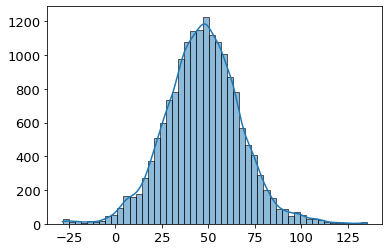

In [ ]:
sns.histplot(data[target],kde = True, bins = 50)

# 修改刻度值大小
plt.tick_params(labelsize=13)
# 添加x, y轴描述信息
plt.xlabel("")
plt.ylabel("")

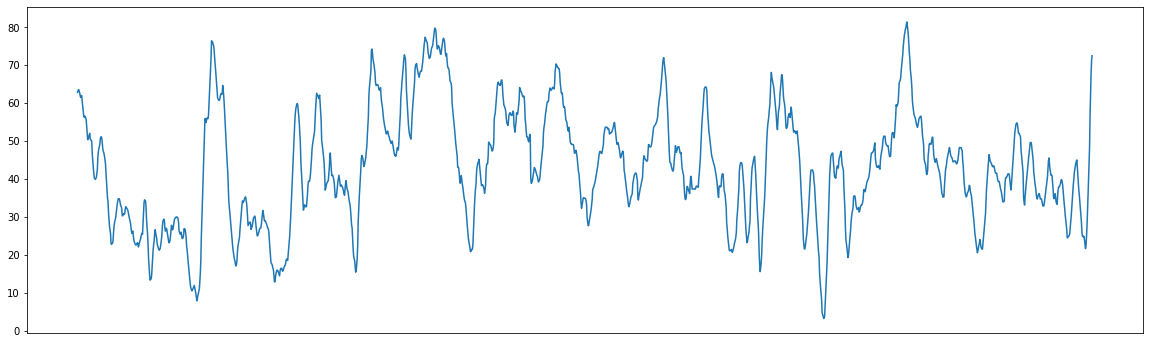

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(data["NOx反应值"][5000:7000])
plt.xticks([])
plt.show()

## Ammonia Plot

In [ ]:
a = [i for i in data['6#炉氨水总流量'] if i == 0]
len(a)

588

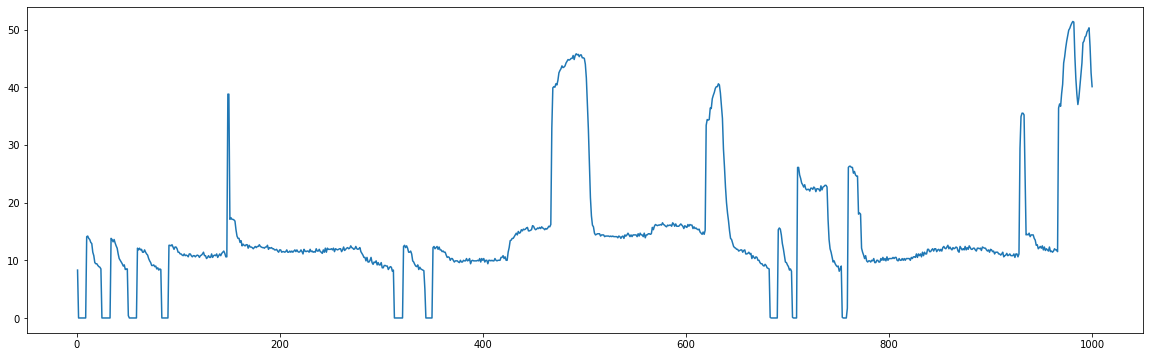

In [ ]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111)
ax.plot(range(1,1001), data['6#炉氨水总流量'][:1000])

# Feature Selection

## MIC - 0.15

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/react_regression.csv',index_col='Time')

In [3]:
!pip install minepy
from minepy import MINE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 496 kB 5.1 MB/s 
  Created wheel for minepy: filename=minepy-1.2.6-cp37-cp37m-linux_x86_64.whl size=177579 sha256=8045f962e23d881e7c6a54b45a041de6f45a1c6541205662b6aa26da5df26054
  Stored in directory: /root/.cache/pip/wheels/81/71/75/403a33428e468a25c93fa7b672d070b304f36642eb699a29e0
Successfully built minepy


In [4]:
mine = MINE(alpha=0.6, c=15)

In [14]:
data.describe()

,NOx反应值,6#一次风机电机电流（额定16.9A）,6#一次风机电机频率反馈,6#一次风机高压柜有功脉冲,6#实际给料量,6#干燥炉排一段下漏渣溜管A温度,6#干燥炉排一段下漏渣溜管B温度,6#干燥炉排一段入口空气流量,6#干燥炉排二段下漏渣溜管A温度,6#干燥炉排二段下漏渣溜管B温度,...,6#锅炉烟气在线分析仪氢氟酸,6#锅炉烟气在线分析仪氯化氢,6#锅炉烟气在线分析仪水含量,6#锅炉烟气在线分析仪流速,6#锅炉烟气在线分析仪温度,6#锅炉烟气在线分析仪烟气浓度,6#锅炉给水压力,6#锅炉给水流量,6#锅炉给水温度,6#预计焚烧量
count,17042.000000,17042.000000,17042.000000,17042.000000,17042.000000,17042.000000,17042.000000,17042.000000,17042.000000,17042.000000,...,17042.000000,17042.000000,17042.000000,17042.000000,17042.000000,17042.000000,17042.000000,17042.000000,17042.00000,17042.000000
mean,47.143045,5.903182,60.762750,50.581193,194.133763,139.419513,138.367370,2.306896,164.911877,170.444263,...,0.572265,10.006137,26.748775,8.565670,127.068423,0.819416,6.711332,44.759440,131.72833,401.616899
std,20.083443,0.209586,1.369657,0.047307,110.726060,7.101766,7.113596,0.083816,4.310320,1.767570,...,0.133546,1.548875,1.678183,1.241920,1.601432,0.518788,0.010480,2.597181,0.16990,26.573165
min,-28.436160,5.395370,58.071754,50.462960,0.000000,121.476585,115.460520,2.135626,146.670410,166.213670,...,0.032407,-0.125000,0.025926,-0.284259,124.055560,0.488426,6.657778,37.464516,131.00853,284.496000
25%,34.507658,5.755787,59.747684,50.543983,102.489600,136.683530,136.868600,2.251382,162.498720,168.906680,...,0.481481,8.975695,25.820370,8.358565,125.701385,0.680555,6.706666,43.064701,131.62077,388.752780
50%,47.192785,5.881482,60.648148,50.581020,205.327400,140.882740,140.295560,2.279058,164.090230,170.419560,...,0.575232,9.812500,26.516666,8.668519,126.944440,0.743056,6.711482,44.142115,131.74057,402.526340
75%,59.730972,6.037963,61.620373,50.613426,278.327200,143.759160,143.728180,2.338906,167.613750,171.805600,...,0.667824,10.937500,27.297222,9.011111,128.194440,0.818287,6.716667,45.515781,131.83376,416.269400
max,135.273470,6.767592,65.844900,50.770832,400.977420,149.709690,145.400120,2.644839,173.883330,174.701390,...,1.010417,17.125000,31.514814,11.341667,132.027770,15.688658,6.765555,61.634224,132.16656,483.176030


In [5]:
attribute_list=list(data.keys())
attribute_list

['NOx反应值',
 '6#一次风机电机电流（额定16.9A）',
 '6#一次风机电机频率反馈',
 '6#一次风机高压柜有功脉冲',
 '6#实际给料量',
 '6#干燥炉排一段下漏渣溜管A温度',
 '6#干燥炉排一段下漏渣溜管B温度',
 '6#干燥炉排一段入口空气流量',
 '6#干燥炉排二段下漏渣溜管A温度',
 '6#干燥炉排二段下漏渣溜管B温度',
 '6#干燥炉排二段下漏渣溜管C温度',
 '6#干燥炉排二段入口空气流量',
 '6#干燥炉排第二段A垃圾层压差',
 '6#干燥炉排第二段B垃圾层压差',
 '6#干燥炉排第二段C垃圾层压差',
 '6#炉SCR反应器旁路挡板门开度反馈',
 '6#炉一次风机出口压力',
 '6#炉一次风机电动风门位置反馈',
 '6#炉一次风机进口压力',
 '6#炉一次风机进口流量',
 '6#炉一次风机进口温度',
 '6#炉一次风空预器出口压力',
 '6#炉一次风空预器出口温度',
 '6#炉主给水电动调节门位置反馈',
 '6#炉主蒸汽压力',
 '6#炉主蒸汽流量',
 '6#炉主蒸汽温度',
 '6#炉二次风机入口电动调节门位置反馈',
 '6#炉二次风机压力',
 '6#炉二次风机温度',
 '6#炉二次风机电动机频率反馈',
 '6#炉二次风机电动调节门（前壁侧）',
 '6#炉二次风流量',
 '6#炉二次风电动调节门（后壁侧）',
 '6#炉右一级减温器出口温度',
 '6#炉右一级减温水电动调节门位置反馈',
 '6#炉右二级减温器出口温度',
 '6#炉右二级减温水电动调节门位置反馈',
 '6#炉启排气动调节门位置反馈',
 '6#炉启排气动隔绝门位置反馈',
 '6#炉垃圾料斗物位A',
 '6#炉垃圾料斗物位B',
 '6#炉垃圾给料溜槽温度',
 '6#炉夜班主汽流量',
 '6#炉左一级减温器出口温度',
 '6#炉左一级减温水电动调节门位置反馈',
 '6#炉左二级减温器出口温度',
 '6#炉左二级减温水电动调节门位置反馈',
 '6#炉干燥炉排一段A入口空气流量',
 '6#炉干燥炉排一段A入口风门',
 '6#炉干燥炉排一段B入口空气流量',
 '6#炉干燥炉排一段B入口风门',
 '6#炉干燥炉排一段C入口空气流量',
 '6#炉干燥炉排一段C入口风门',
 '6#炉

In [16]:
from sklearn.utils import shuffle

data_x = shuffle(data)

result=[]

x=data_x[attribute_list[0]].iloc[:5000].values

mine = MINE(alpha=0.6, c=15)

In [17]:
for i in range(1,len(attribute_list)):
    y=data_x[attribute_list[i]].iloc[:5000].values
    mine.compute_score(x, y)
    result.append(float(format(mine.mic(),'.5f')))

In [18]:
attribute=attribute_list[1:]
dictionary=dict(zip(attribute,result))
by_value = sorted(dictionary.items(),key = lambda item:item[1],reverse=True)

x = []
y = []
for d in by_value:
    x.append(d[0])
    y.append(d[1])

In [27]:
max = y[0]
min = y[-1]
y1 = []
for i in y:
  y1.append((i-min)/max-min)
print(y1)

[1.0, 0.6396700841972622, 0.5738873933214961, 0.5384901769860817, 0.5358267942035626, 0.5294117647058824, 0.47479809840197035, 0.46317085743742487, 0.4494530041812246, 0.4384271722320866, 0.42814594192107225, 0.42562575176126927, 0.4165473394810699, 0.4155736296466006, 0.40847127555988316, 0.40205624606220286, 0.4003665731141532, 0.4000515493441778, 0.39538346984363365, 0.3800904977375566, 0.3767970674150868, 0.37673979036600036, 0.375766080531531, 0.367260438742196, 0.3649407182541955, 0.36456841743513374, 0.36425339366515835, 0.363938369895183, 0.36084540924451575, 0.3572369551520706, 0.35634916089123087, 0.3542871871241194, 0.35388624778051436, 0.3511655879489089, 0.3504496248353285, 0.34833037401913053, 0.3467838936937969, 0.3422876453405121, 0.3387078297726101, 0.3378486740363137, 0.3378486740363137, 0.337762758462684, 0.33572942322011573, 0.33547167649922677, 0.33418294289478206, 0.33358153387937456, 0.3331519560112263, 0.3279397445443611, 0.32748152815166964, 0.32685148061171887

In [28]:
y1[:12]

[1.0,
 0.6396700841972622,
 0.5738873933214961,
 0.5384901769860817,
 0.5358267942035626,
 0.5294117647058824,
 0.47479809840197035,
 0.46317085743742487,
 0.4494530041812246,
 0.4384271722320866,
 0.42814594192107225,
 0.42562575176126927]

In [19]:
by_value

[('6#炉氨水总流量', 0.34918),
 ('6#焚烧炉膛前温度', 0.22336),
 ('6#炉白班主汽流量', 0.20039),
 ('6#炉排烟SO2小时实时均值', 0.18803),
 ('6#炉夜班主汽流量', 0.1871),
 ('6#炉排烟CO小时实时均值', 0.18486),
 ('6#炉省煤器灰斗出口烟气温度', 0.16579),
 ('6#实际给料量', 0.16173),
 ('6#锅炉烟气在线分析仪一氧化碳', 0.15694),
 ('6#焚烧炉膛左温度', 0.15309),
 ('6#炉汽包压力2', 0.1495),
 ('6#炉汽包压力1', 0.14862),
 ('6#焚烧炉第二飞灰斗左温度', 0.14545),
 ('6#炉炉膛温度平均值', 0.14511),
 ('6#干燥炉排一段下漏渣溜管A温度', 0.14263),
 ('6#炉排烟HCL小时实时均值', 0.14039),
 ('6#炉左二级减温器出口温度', 0.1398),
 ('6#焚烧炉顶部前温度', 0.13969),
 ('6#锅炉右1级减温水流量', 0.13806),
 ('6#炉左一级减温水电动调节门位置反馈', 0.13272),
 ('6#焚烧炉膛右温度', 0.13157),
 ('6#焚烧炉入口部前烟气温度', 0.13155),
 ('6#炉右二级减温器出口温度', 0.13121),
 ('6#炉炉落差段冷却风温度', 0.12824),
 ('6#锅炉右2级减温水流量', 0.12743),
 ('6#炉干燥炉排二段A入口风门', 0.1273),
 ('6#焚烧炉第一飞灰斗左温度', 0.12719),
 ('6#炉主蒸汽流量', 0.12708),
 ('6#炉汇汽集箱压力', 0.126),
 ('6#焚烧炉入口部右烟气温度', 0.12474),
 ('6#焚烧炉第二飞灰斗右温度', 0.12443),
 ('6#焚烧炉顶部左温度', 0.12371),
 ('6#炉燃烧炉排三段入口空气流量', 0.12357),
 ('6#炉燃烧炉排三段A入口空气流量', 0.12262),
 ('6#焚烧炉第三飞灰斗左温度', 0.12237),
 ('6#炉主蒸汽压力', 0.12163),
 ('6#炉炉排风量

In [ ]:
for i in range(len(y)):
  if y[i]>0.15 and y[i+1]<0.15:
    break
print(i)

11


In [ ]:
data_a=data[target]
data_a

Time
2021-07-21 19:23:21    18.71131
2021-07-21 19:23:31    18.04573
2021-07-21 19:23:41    17.32302
2021-07-21 19:23:51    16.61920
2021-07-21 19:24:01    15.95921
                         ...   
2021-07-23 23:59:01    74.54933
2021-07-23 23:59:11    73.57192
2021-07-23 23:59:20    74.52735
2021-07-23 23:59:30    76.19334
2021-07-23 23:59:40    76.63812
Name: NOx反应值, Length: 17042, dtype: float64

In [ ]:
data_b=data[x[:i]]

In [ ]:
df=pd.concat([data_a,data_b],axis=1)
df

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/MIC_0.15_regression.csv')

## Feature Importance - RF

In [ ]:
data1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/regression.csv',index_col='Time')

In [ ]:
data1.describe()

,6#炉排烟NOx小时实时均值,6#一次风机电机电流（额定16.9A）,6#一次风机电机频率反馈,6#一次风机高压柜有功脉冲,6#实际给料量,6#干燥炉排一段下漏渣溜管A温度,6#干燥炉排一段下漏渣溜管B温度,6#干燥炉排一段入口空气流量,6#干燥炉排二段下漏渣溜管A温度,6#干燥炉排二段下漏渣溜管B温度,...,6#锅炉烟气在线分析仪氮氧化物,6#锅炉烟气在线分析仪氯化氢,6#锅炉烟气在线分析仪水含量,6#锅炉烟气在线分析仪流速,6#锅炉烟气在线分析仪温度,6#锅炉烟气在线分析仪烟气浓度,6#锅炉给水压力,6#锅炉给水流量,6#锅炉给水温度,6#预计焚烧量
count,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,...,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000,17047.000000
mean,154.748684,5.903162,60.762583,50.581189,194.127052,139.420999,138.368739,2.306870,164.912675,170.444405,...,201.755620,10.006069,26.748659,8.565741,127.068532,0.819409,6.711332,44.759248,131.728361,401.618289
std,7.686472,0.209563,1.369491,0.047302,110.710512,7.101254,7.113002,0.083817,4.309940,1.767330,...,23.374488,1.548653,1.677951,1.241746,1.601210,0.518713,0.010479,2.596825,0.169884,26.569392
min,137.083650,5.395370,58.071754,50.462960,0.000000,121.476585,115.460520,2.135626,146.670410,166.213670,...,-0.370370,-0.125000,0.025926,-0.284259,124.055560,0.488426,6.657778,37.464516,131.008530,284.496000
25%,150.466285,5.755556,59.747684,50.543983,102.489600,136.683530,136.868600,2.251361,162.498720,168.906680,...,187.148145,8.975695,25.820370,8.359260,125.701385,0.680555,6.706666,43.065987,131.620770,388.752780
50%,154.037320,5.881482,60.648148,50.581020,205.327400,140.882740,140.295560,2.279049,164.090230,170.419560,...,201.722210,9.812500,26.516666,8.669444,126.944440,0.743056,6.711482,44.141815,131.740570,402.526340
75%,160.100955,6.037963,61.619213,50.613426,278.327200,143.759160,143.728180,2.338865,167.613750,171.805600,...,216.648150,10.937500,27.295834,9.011111,128.194440,0.818287,6.716667,45.515467,131.833760,416.269400
max,182.017410,6.767592,65.844900,50.770832,400.977420,149.709690,145.400120,2.644839,173.883330,174.701390,...,287.444460,17.125000,31.514814,11.341667,132.027770,15.688658,6.765555,61.634224,132.166560,483.176030


In [ ]:
data2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/react_regression.csv',index_col='Time')

In [ ]:
data2.describe()

,NOx反应值,6#一次风机电机电流（额定16.9A）,6#一次风机电机频率反馈,6#一次风机高压柜有功脉冲,6#实际给料量,6#干燥炉排一段下漏渣溜管A温度,6#干燥炉排一段下漏渣溜管B温度,6#干燥炉排一段入口空气流量,6#干燥炉排二段下漏渣溜管A温度,6#干燥炉排二段下漏渣溜管B温度,...,6#锅炉烟气在线分析仪氢氟酸,6#锅炉烟气在线分析仪氯化氢,6#锅炉烟气在线分析仪水含量,6#锅炉烟气在线分析仪流速,6#锅炉烟气在线分析仪温度,6#锅炉烟气在线分析仪烟气浓度,6#锅炉给水压力,6#锅炉给水流量,6#锅炉给水温度,6#预计焚烧量
count,17042.000000,17042.000000,17042.000000,17042.000000,17042.000000,17042.000000,17042.000000,17042.000000,17042.000000,17042.000000,...,17042.000000,17042.000000,17042.000000,17042.000000,17042.000000,17042.000000,17042.000000,17042.000000,17042.00000,17042.000000
mean,47.143045,5.903182,60.762750,50.581193,194.133763,139.419513,138.367370,2.306896,164.911877,170.444263,...,0.572265,10.006137,26.748775,8.565670,127.068423,0.819416,6.711332,44.759440,131.72833,401.616899
std,20.083443,0.209586,1.369657,0.047307,110.726060,7.101766,7.113596,0.083816,4.310320,1.767570,...,0.133546,1.548875,1.678183,1.241920,1.601432,0.518788,0.010480,2.597181,0.16990,26.573165
min,-28.436160,5.395370,58.071754,50.462960,0.000000,121.476585,115.460520,2.135626,146.670410,166.213670,...,0.032407,-0.125000,0.025926,-0.284259,124.055560,0.488426,6.657778,37.464516,131.00853,284.496000
25%,34.507658,5.755787,59.747684,50.543983,102.489600,136.683530,136.868600,2.251382,162.498720,168.906680,...,0.481481,8.975695,25.820370,8.358565,125.701385,0.680555,6.706666,43.064701,131.62077,388.752780
50%,47.192785,5.881482,60.648148,50.581020,205.327400,140.882740,140.295560,2.279058,164.090230,170.419560,...,0.575232,9.812500,26.516666,8.668519,126.944440,0.743056,6.711482,44.142115,131.74057,402.526340
75%,59.730972,6.037963,61.620373,50.613426,278.327200,143.759160,143.728180,2.338906,167.613750,171.805600,...,0.667824,10.937500,27.297222,9.011111,128.194440,0.818287,6.716667,45.515781,131.83376,416.269400
max,135.273470,6.767592,65.844900,50.770832,400.977420,149.709690,145.400120,2.644839,173.883330,174.701390,...,1.010417,17.125000,31.514814,11.341667,132.027770,15.688658,6.765555,61.634224,132.16656,483.176030


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df1= data1[:10000].values
df2= data2[:10000].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(df2[:,1:],df2[:,0], test_size=0.2, shuffle=False)
X_train1, X_test1, y_train1, y_test1 = train_test_split(df1[:,1:],df1[:,0], test_size=0.2, shuffle=False)

rand_reg1 = RandomForestRegressor(n_estimators=100, min_samples_split = 2, min_samples_leaf = 5, max_depth = 100, random_state=0)
start_time1=time.process_time()
rand_reg1.fit(X_train1, y_train1)
end_time1=time.process_time()
y_predict1 = rand_reg1.predict(X_test1)

rand_reg2 = RandomForestRegressor(n_estimators=100, min_samples_split = 2, min_samples_leaf = 5, max_depth = 100, random_state=0)
start_time2=time.process_time()
rand_reg2.fit(X_train2, y_train2)
end_time2=time.process_time()
y_predict2 = rand_reg2.predict(X_test2)

In [ ]:
rmse1 = sqrt(mean_squared_error(y_test1,y_predict1))
acc_list1 = [i for i in abs(y_predict1-y_test1)/y_test1 if i < 0.2]
mape1 = round((abs(y_predict1-y_test1)/y_test1).mean(),4)
acc1 = round(len(acc_list1)/len(y_test1),4)

rmse2 = sqrt(mean_squared_error(y_test2,y_predict2))
acc_list2 = [i for i in abs(y_predict2-y_test2)/y_test2 if i < 0.2]
mape2 = round((abs(y_predict2-y_test2)/y_test2).mean(),4)
acc2 = round(len(acc_list2)/len(y_test2),4)

print("-----RF1训练结果\n")
print(f"-----RMSE: {rmse1}, MAPE: {mape1}, Accuracy: {acc1}, Time: {end_time1-start_time1} \n")

print("-----RF2训练结果\n")
print(f"-----RMSE: {rmse2}, MAPE: {mape2}, Accuracy: {acc2}, Time: {end_time2-start_time2} \n")

-----RF1训练结果

-----RMSE: 9.298911588493054, MAPE: 0.059, Accuracy: 1.0, Time: 91.65769361600002 

-----RF2训练结果

-----RMSE: 14.648009960544174, MAPE: -0.0722, Accuracy: 0.4325, Time: 102.290847542 



In [ ]:
importance1 = rand_reg1.feature_importances_
indices1 = np.argsort(importance1)[::-1]
features1 = data1.columns[1:]

In [ ]:
score_dict1 = dict(zip(list(features1), list(importance1)))
score_order1 = sorted(score_dict1.items(),key=lambda x:x[1],reverse=True)
score_order1

[('6#炉白班主汽流量', 0.36978499590129055),
 ('6#干燥炉排二段下漏渣溜管A温度', 0.14892582166551),
 ('6#炉料落渣管冷却回水温度B', 0.1420563292024762),
 ('6#炉排烟粉尘小时实时均值', 0.034306623180678),
 ('6#炉排烟CO小时实时均值', 0.03165235363813441),
 ('6#焚烧炉膛左温度', 0.03088843336473663),
 ('6#炉右二级减温水电动调节门位置反馈', 0.02839239767147446),
 ('6#炉燃烧炉排一段B入口空气流量', 0.026805870388416267),
 ('6#炉夜班主汽流量', 0.022037442196763138),
 ('6#干燥炉排一段下漏渣溜管A温度', 0.01325648892649297),
 ('6#炉燃烧炉排一段B入口风门', 0.01186006010733628),
 ('6#炉排烟SO2小时实时均值', 0.010458554892966529),
 ('6#焚烧炉第一飞灰斗右温度', 0.009257031944988631),
 ('6#炉粉尘折算日均值', 0.00802118266926497),
 ('6#炉燃尽炉排上部左温度', 0.007942836978869097),
 ('6#锅炉烟气在线分析仪二氧化硫', 0.00614445555366191),
 ('6#炉料落渣管冷却回水温度A', 0.005993490184298582),
 ('6#炉排烟HF小时实时均值', 0.005772645271432624),
 ('6#焚烧炉第一飞灰斗左温度', 0.005740111149866945),
 ('6#炉右二级减温器出口温度', 0.00451536965519681),
 ('6#炉炉落差段冷却风温度', 0.004154612532716177),
 ('6#炉排烟HCL小时实时均值', 0.004118844038743063),
 ('6#炉垃圾料斗物位B', 0.00398881890663548),
 ('6#锅炉烟气在线分析仪氯化氢', 0.0031996508028214643),
 ('6#焚烧炉

In [ ]:
item1 = []
score1 = []
for i in score_order1:
  item1.append(i[0])
  score1.append(i[1])

In [ ]:
score1_sum = [sum(score1[:i]) for i,j in enumerate(score1)]

In [ ]:
importance2 = rand_reg2.feature_importances_
indices2 = np.argsort(importance2)[::-1]
features2 = data2.columns[1:]

In [ ]:
score_dict2 = dict(zip(list(features2), list(importance2)))
score_order2 = sorted(score_dict2.items(),key=lambda x:x[1],reverse=True)
score_order2

[('6#炉氨水总流量', 0.3781242632378125),
 ('6#锅炉烟气在线分析仪一氧化碳', 0.07055745888405605),
 ('6#炉氧量小时均值_时', 0.03540624156956905),
 ('6#炉排烟粉尘小时实时均值', 0.01800277693971418),
 ('6#焚烧炉入口部右烟气温度', 0.016756296406938292),
 ('6#锅炉烟气在线分析仪水含量', 0.016338820598201548),
 ('6#炉二次风电动调节门（后壁侧）', 0.01597347530554203),
 ('6#焚烧炉顶部左温度', 0.014904886342294305),
 ('6#炉排烟HF小时实时均值', 0.013261734582561288),
 ('6#预计焚烧量', 0.012852669139341322),
 ('6#焚烧炉膛右温度', 0.01208975018358014),
 ('6#锅炉烟气在线分析仪氯化氢', 0.011860096974911362),
 ('6#炉一次风空预器出口温度', 0.010919622882010961),
 ('6#炉干燥炉排上部左温度', 0.010681649785389626),
 ('6#燃烧炉排上部左温度', 0.010416687884603855),
 ('6#炉省煤器出口氧含量', 0.010354675004456438),
 ('6#炉排烟CO小时实时均值', 0.010343996919422197),
 ('6#炉干燥炉排上部右温度', 0.008735544938532132),
 ('6#焚烧炉顶部右温度', 0.00864758763603637),
 ('6#焚烧炉顶部前温度', 0.007808393645887404),
 ('6#燃烧炉排上部右温度', 0.007635971734563628),
 ('6#炉排烟HCL小时实时均值', 0.007518314599117307),
 ('6#焚烧炉第一飞灰斗左温度', 0.007387985979101948),
 ('6#炉炉膛温度平均值', 0.007331000548837801),
 ('6#炉排烟SO2小时实时均值', 0.0071134

In [ ]:
item2 = []
score2 = []
for i in score_order2:
  item2.append(i[0])
  score2.append(i[1])

In [ ]:
score2_sum = [sum(score2[:i]) for i,j in enumerate(score2)]

In [ ]:
score2_sum

[0,
 0.4314856047180395,
 0.5421058519181665,
 0.645184523885293,
 0.7153836521598866,
 0.778492127869915,
 0.8346525584448035,
 0.8892896549834846,
 0.9312345209831133,
 0.9694475385112724,
 0.9956162681809787]

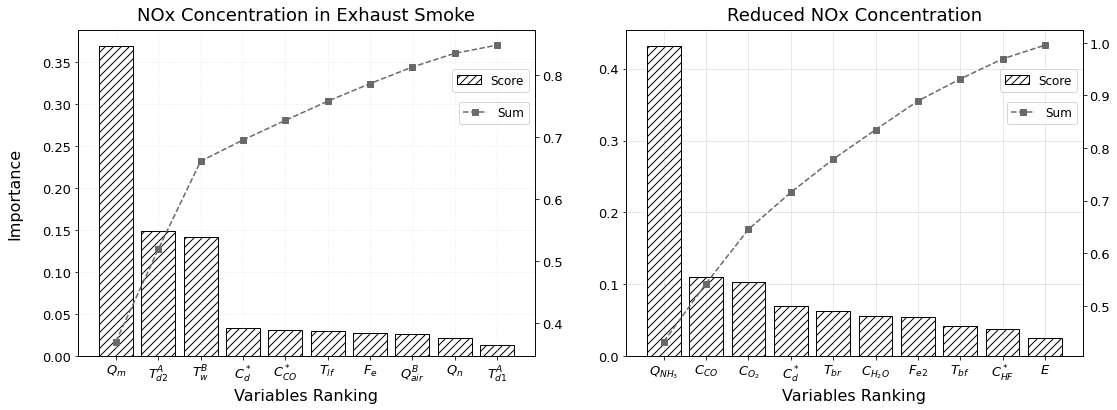

In [ ]:
fig3 = plt.figure(figsize = (18,6))
ax1 = fig3.add_subplot(121)
labels = ['$Q_m$','$T^{A}_{d2}$','$T^B_w$','$C^*_{d}$','$C^*_{CO}$','$T_{lf}$','$F_{e}$','$Q^B_{air}$','$Q_{n}$','$T^A_{d1}$']
ax1.bar(np.arange(1,11,1),score1[:10],width=0.8,label='Score', tick_label=labels,color='white',hatch='///',edgecolor="k")
ax1.set_xticks([1,2,3,4,5,6,7,8,9,10,11])
plt.grid(axis='both',color='lightgrey',linestyle='--',lw=0.5,alpha=0.5)
plt.legend(loc=1,bbox_to_anchor=(1, 0.9),fontsize=12)
plt.tick_params(labelsize=13)
ax2 = ax1.twinx()
plt.tick_params(labelsize=13)
ax2.plot(range(1,11),score1_sum[1:11],linestyle='dashed',label='Sum',color='dimgrey',marker='s')
plt.legend(loc=1,bbox_to_anchor=(1, 0.8),fontsize=12)
plt.title('NOx Concentration in Exhaust Smoke', fontsize=18,pad=10)

ax1.set_ylabel('Importance',fontsize=16,rotation=90,labelpad=20)
ax1.set_xlabel('Variables Ranking',fontsize=16)

ax1 = fig3.add_subplot(122)
# labels = ['$Q_{NH_{3}}$','$C_{CO}$','$C^*_{CO}$','$C^*_{SO_{2}}$','$T_{a}$','$Q_{n}$','$P_{2}$','$T_{lf}$','$T_{ff}$','$Q_{m}$']
labels = ['$Q_{NH_{3}}$','$C_{CO}$','$C_{O_{2}}$','$C^*_{d}$','$T_{br}$','$C_{H_{2}O}$','$F_{e2}$','$T_{bf}$','$C^*_{HF}$','$E$']
ax1.bar(np.arange(1,11,1),score2[:10],width=0.8,label='Score', tick_label=labels,color='white',hatch='///',edgecolor="k")
ax1.set_xticks([1,2,3,4,5,6,7,8,9,10,11])
plt.grid(axis='both',color='grey',linestyle='--',lw=0.5,alpha=0.5)
plt.legend(loc=1,bbox_to_anchor=(1, 0.9),fontsize=12)
plt.tick_params(labelsize=13)
ax2 = ax1.twinx()
plt.tick_params(labelsize=13)
ax2.plot(range(1,11),score2_sum[1:11],linestyle='dashed',label='Sum',color='dimgrey',marker='s')
plt.legend(loc=1,bbox_to_anchor=(1, 0.8),fontsize=12)
plt.title('Reduced NOx Concentration', fontsize=18,pad=10)

ax1.set_xlabel('Variables Ranking',fontsize=16)

# plt.subplots_adjust(left=None, bottom=None, right=0.5, top=None, wspace=None, hspace=None)

# plt.savefig("feature-importances.eps")
plt.savefig("feature-importances-new.pdf")

# Time Delay

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIC_0.15_regression.csv',index_col='Time')

In [ ]:
!pip install minepy
from minepy import MINE

In [ ]:
mine = MINE(alpha=0.6, c=15)

In [ ]:
class Population:
    def __init__(self, min_range, max_range, dim, factor, rounds, size, object_func, CR=0.75):
        self.min_range = min_range
        self.max_range = max_range
        self.dimension = dim
        self.factor = factor
        self.rounds = rounds
        self.size = size
        self.cur_round = 1
        self.CR = CR
        self.get_object_function_value = object_func

        # 初始化种群
        self.individuality = [np.array([random.uniform(self.min_range, self.max_range) for s in range(self.dimension)]) for tmp in range(size)]
        self.object_function_values = [self.get_object_function_value(v) for v in self.individuality]
        self.mutant = None
 
    def mutate(self):
        self.mutant = []
        for i in range(self.size):
            r0, r1, r2 = 0, 0, 0
            while r0 == r1 or r1 == r2 or r0 == r2 or r0 == i:
                r0 = random.randint(0, self.size-1)
                r1 = random.randint(0, self.size-1)
                r2 = random.randint(0, self.size-1)
            tmp = self.individuality[r0] + (self.individuality[r1] - self.individuality[r2]) * self.factor
            for t in range(self.dimension):
                if tmp[t] > self.max_range or tmp[t] < self.min_range:
                    tmp[t] = random.uniform(self.min_range, self.max_range)
            self.mutant.append(tmp)
    def crossover_and_select(self):
        for i in range(self.size):
            Jrand = random.randint(0, self.dimension)
            for j in range(self.dimension):
                if random.random() > self.CR and j != Jrand:
                    self.mutant[i][j] = self.individuality[i][j]
                tmp = self.get_object_function_value(self.mutant[i])
                if tmp < self.object_function_values[i]:
                    self.individuality[i] = self.mutant[i]
                    self.object_function_values[i] = tmp

 
    def print_best(self):
        m = min(self.object_function_values)
        i = self.object_function_values.index(m)
        print("轮数：" + str(self.cur_round))
        print("最佳个体：" + str(self.individuality[i]))
        print("目标函数值：" + str(m))
        return max(self.object_function_values)
 
    def evolution(self):
        while self.cur_round < self.rounds:
            self.mutate()
            self.crossover_and_select()
            self.print_best()
            self.cur_round = self.cur_round + 1
        return self.print_best()

In [ ]:
def calculate(shift_list):
    results_rel = []

    for i,j in enumerate(shift_list):
        x = data.iloc[:,i+1]
        y = data.iloc[:,0].shift(-round(j))
        mine.compute_score(list(x[3000:4000]),list(y[3000:4000]))
        results_rel.append(mine.mic())

    results_red = []

    for i in range(0,len(shift_list)-1):
        for j in range(i+1,len(shift_list)):
            x = data.iloc[:,i+1].shift(-round(shift_list[i]))
            y = data.iloc[:,j+1].shift(-round(shift_list[j]))
            mine.compute_score(list(x[3000:4000]),list(y[3000:4000]))
            results_red.append(mine.mic())

    return (np.mean(results_red)-np.mean(results_rel))

In [ ]:
if __name__ == "__main__":
    p = Population(min_range=1, max_range=50, dim=11, factor=0.8, rounds=50, size=100, object_func=calculate)
    p.evolution()

轮数：49
最佳个体：[ 1.44366545  9.40107596 28.13469586  9.00197471  9.98279375 38.49110348
 47.89836755 15.70160161  1.98391078  8.76058128 25.3931304 ]
目标函数值：0.1204487851270094
轮数：50
最佳个体：[ 1.44366545  9.40107596 28.13469586  9.00197471  9.98279375 38.49110348
 47.89836755 15.70160161  1.98391078  8.76058128 25.3931304 ]
目标函数值：0.1204487851270094

In [ ]:
delay=[ 1.44366545,  9.40107596, 28.13469586,  9.00197471,  9.98279375, 38.49110348,
 47.89836755, 15.70160161,  1.98391078,  8.76058128, 25.3931304]

for i,j in enumerate(delay):
  data.iloc[:,i+1] = data.iloc[:,i+1].shift(-round(j))

data = data[:-50]

In [ ]:
data.head()

,NOx反应值,6#炉氨水总流量,6#焚烧炉膛前温度,6#炉白班主汽流量,6#炉排烟CO小时实时均值,6#炉夜班主汽流量,6#实际给料量,6#炉排烟SO2小时实时均值,6#焚烧炉膛左温度,6#炉省煤器灰斗出口烟气温度,6#锅炉烟气在线分析仪一氧化碳,6#炉汽包压力2
Time,,,,,,,,,,,,
2021-07-21 19:23:21,18.71131,0.0,955.32166,494.91718,2.187639,0.0,171.25461,9.042582,1001.6025,208.91460,3.513889,4.065278
2021-07-21 19:23:31,18.04573,0.0,955.22687,495.04153,2.188784,0.0,171.25461,9.034406,1001.6985,208.91460,3.138889,4.065972
2021-07-21 19:23:41,17.32302,0.0,955.22687,495.16837,2.189729,0.0,171.25461,9.026864,1001.6985,208.87370,3.138889,4.065972
2021-07-21 19:23:51,16.61920,0.0,955.03705,495.28793,2.185194,0.0,171.25461,9.018655,1001.6985,208.87370,2.763889,4.065972
2021-07-21 19:24:01,15.95921,0.0,955.32166,495.41263,2.179012,0.0,171.25461,9.010250,1001.7946,208.86008,2.763889,4.065278


In [ ]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/NOx-216.csv')

# Modeling

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NOx-216.csv',index_col='Time')

In [ ]:
data.head(5)

,Reduced NOx,Ammonia Flow,Furnace Temperature,Furnace Steam Flow - Day,CO Concentration in Exhaust Smoke,Furnace Steam flow - Night,Actual Feed Quantity,SO2 Concentration in Exhaust Smoke,Furnace Temperature - Left,Flue Gas Outlet Temperature,CO Concentration in Boiler,Boiler Drum Pressure 2
Time,,,,,,,,,,,,
2021-07-21 19:23:21,18.71131,0.0,0.467433,0.863826,0.111325,0.0,0.427093,0.313901,0.462162,1.000000,0.007602,0.226755
2021-07-21 19:23:31,18.04573,0.0,0.465061,0.864043,0.111383,0.0,0.427093,0.313180,0.463555,1.000000,0.006976,0.231648
2021-07-21 19:23:41,17.32302,0.0,0.465061,0.864264,0.111431,0.0,0.427093,0.312514,0.463555,0.998545,0.006976,0.231648
2021-07-21 19:23:51,16.61920,0.0,0.460312,0.864473,0.111201,0.0,0.427093,0.311790,0.463555,0.998545,0.006350,0.231648
2021-07-21 19:24:01,15.95921,0.0,0.467433,0.864690,0.110886,0.0,0.427093,0.311048,0.464949,0.998061,0.006350,0.226755


In [ ]:
data1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/6Stove.csv',index_col='Time')
data1.head(5)

,6#一次风机电机电流（额定16.9A）,6#一次风机电机频率反馈,6#一次风机高压柜有功脉冲,6#实际给料量,6#干燥炉排一段下漏渣溜管A温度,6#干燥炉排一段下漏渣溜管B温度,6#干燥炉排一段入口空气流量,6#干燥炉排二段下漏渣溜管A温度,6#干燥炉排二段下漏渣溜管B温度,6#干燥炉排二段下漏渣溜管C温度,...,6#锅炉烟气在线分析仪氮氧化物,6#锅炉烟气在线分析仪氯化氢,6#锅炉烟气在线分析仪水含量,6#锅炉烟气在线分析仪流速,6#锅炉烟气在线分析仪温度,6#锅炉烟气在线分析仪烟气浓度,6#锅炉给水压力,6#锅炉给水流量,6#锅炉给水温度,6#预计焚烧量
Time,,,,,,,,,,,,,,,,,,,,,
2021-07-21 19:22:31,5.925000,60.178238,50.581020,171.25461,144.40920,142.73804,2.216420,167.42451,170.98668,172.65578,...,175.23148,9.729167,26.375000,8.721296,127.48611,0.805556,6.715556,44.072120,131.83376,406.3584
2021-07-21 19:22:41,5.872222,60.178238,50.574078,171.25461,144.50208,142.83084,2.216543,167.61375,170.98668,172.37240,...,174.50926,9.718750,26.375000,8.749074,127.48611,0.762732,6.712963,44.159450,131.83376,406.3584
2021-07-21 19:22:51,5.897222,60.201390,50.534725,171.25461,144.50208,143.10928,2.210699,167.61375,170.98668,172.18347,...,173.73148,9.798612,26.347221,8.906481,127.43750,0.872685,6.711852,44.281490,131.83376,406.3584
2021-07-21 19:23:01,5.737037,60.210644,50.574078,171.25461,144.50208,143.29494,2.211831,167.80304,170.79765,172.12051,...,172.97223,9.812500,26.347221,8.797222,127.43750,0.818287,6.719259,44.076744,131.83376,406.3584
2021-07-21 19:23:11,5.746296,60.196760,50.574078,171.25461,144.50208,143.20210,2.241666,167.70840,170.89214,172.12051,...,172.25926,9.812500,26.322222,8.869445,127.36806,0.715278,6.709259,43.945534,131.83376,406.3584


In [ ]:
data3 = data1[['6#炉排烟NOx小时实时均值','6#锅炉烟气在线分析仪氮氧化物']]
data3['6#锅炉烟气在线分析仪氮氧化物'] = data3['6#锅炉烟气在线分析仪氮氧化物'].shift(5)

In [ ]:
data = pd.merge(data, data3, on = 'Time')

In [ ]:
data.head(5)

,Reduced NOx,Ammonia Flow,Furnace Temperature,Furnace Steam Flow - Day,CO Concentration in Exhaust Smoke,Furnace Steam flow - Night,Actual Feed Quantity,SO2 Concentration in Exhaust Smoke,Furnace Temperature - Left,Flue Gas Outlet Temperature,CO Concentration in Boiler,Boiler Drum Pressure 2,6#炉排烟NOx小时实时均值,6#锅炉烟气在线分析仪氮氧化物
Time,,,,,,,,,,,,,,
2021-07-21 19:23:21,18.71131,0.0,0.467433,0.863826,0.111325,0.0,0.427093,0.313901,0.462162,1.000000,0.007602,0.226755,156.52017,175.23148
2021-07-21 19:23:31,18.04573,0.0,0.465061,0.864043,0.111383,0.0,0.427093,0.313180,0.463555,1.000000,0.006976,0.231648,156.46353,174.50926
2021-07-21 19:23:41,17.32302,0.0,0.465061,0.864264,0.111431,0.0,0.427093,0.312514,0.463555,0.998545,0.006976,0.231648,156.40846,173.73148
2021-07-21 19:23:51,16.61920,0.0,0.460312,0.864473,0.111201,0.0,0.427093,0.311790,0.463555,0.998545,0.006350,0.231648,156.35303,172.97223
2021-07-21 19:24:01,15.95921,0.0,0.467433,0.864690,0.110886,0.0,0.427093,0.311048,0.464949,0.998061,0.006350,0.226755,156.30005,172.25926


## SVR

In [ ]:
df= data.values
# 归一化
df[:,1:] = (df[:,1:]-df[:,1:].min(axis=0))/(df[:,1:].max(axis=0)-df[:,1:].min(axis=0))
X_train, X_test, y_train, y_test = train_test_split(df[:,1:],df[:,0], test_size=0.2)

clf = SVR(kernel='rbf', C=3, epsilon=0.1)
start_time=time.process_time()
clf.fit(X_train, y_train)
end_time=time.process_time()

y_predict = clf.predict(X_test)

rmse = sqrt(mean_squared_error(y_test,y_predict))
acc_list = [i for i in abs(y_predict-y_test)/y_test if i < 0.05]
mape = round((abs(y_predict-y_test)/abs(y_test)).mean(),4)
acc = round(len(acc_list)/len(y_test),4)

In [ ]:
clf.dual_coef_

array([[ 3., -3.,  3., ..., -3.,  3., -3.]])

In [ ]:
clf.coef_

array([[ 94.04969985, -12.64728319,  -4.11884017,  20.37432791,
          0.82111631,  11.9186112 ,   2.17575899,  -0.49154576,
        -10.21605156, -24.91124385,  10.61983488]])

In [ ]:
clf.support_vectors_

array([[1.35501355e-01, 4.81680999e-01, 9.44251160e-01, ...,
        6.51822791e-01, 2.08579573e-04, 2.49592488e-01],
       [8.31074977e-02, 6.31408147e-01, 9.44251160e-01, ...,
        7.47113549e-01, 2.01626910e-03, 2.38173698e-01],
       [1.18337850e-01, 3.86071404e-02, 9.41994822e-01, ...,
        6.97282123e-01, 1.39053037e-03, 2.43066660e-01],
       ...,
       [1.40018067e-01, 4.16795732e-01, 9.44251160e-01, ...,
        5.48882734e-01, 4.54239939e-03, 1.38663276e-01],
       [1.01174345e-01, 4.72793601e-03, 9.41994822e-01, ...,
        6.12666377e-01, 1.39053037e-03, 1.77814017e-01],
       [0.00000000e+00, 1.47414222e-01, 8.52470593e-01, ...,
        4.40245187e-01, 6.95264131e-05, 1.33765382e-01]])

In [ ]:
np.dot(clf.dual_coef_ , clf.support_vectors_).shape

(1, 11)

In [ ]:
clf.intercept_

array([45.70999943])

In [ ]:
X_test[0].shape

(11,)

In [ ]:
np.dot(np.dot(clf.dual_coef_ , clf.support_vectors_),X_test[0].reshape(-1,1))

array([[-34.36602154]])

In [ ]:
clf.predict(X_test[0].reshape(1,-1))

array([41.38656951])

In [ ]:
print("-----SVR训练结果\n")
print(f"-----RMSE: {rmse}, MAPE: {mape}, Accuracy: {acc}, Time: {end_time-start_time} \n")

-----SVR训练结果

-----RMSE: 14.782868703471859, MAPE: 0.799, Accuracy: 0.165, Time: 22.456608848000002 



In [ ]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#2 Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:2].values.astype(float)
y = dataset.iloc[:,2:3].values.astype(float)
#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='linear',C=10, epsilon=0.1)
regressor.fit(X,y)
#5 Predicting a new result
# y_pred = regressor.predict()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, kernel='linear')

In [ ]:
regressor.dual_coef_

array([[ 10.        ,   9.36963878,  -9.36963878, -10.        ,
        -10.        , -10.        ,  10.        ,  10.        ]])

In [ ]:
regressor.intercept_

array([-0.26758561])

In [ ]:
regressor.predict([[100]])

array([43.62513577])

In [ ]:
regressor.support_vectors_

array([[-1.5666989 ],
       [-0.52223297],
       [ 0.52223297],
       [ 1.5666989 ]])

In [ ]:
regressor.coef_

array([[0.43892721]])

SVR 散点图

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

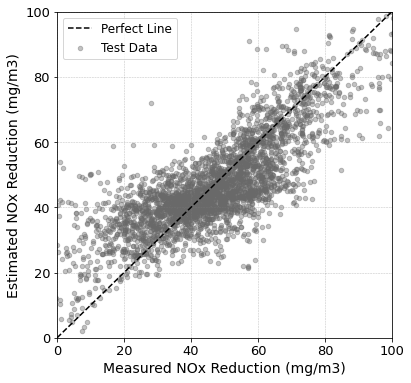

In [ ]:
fig = plt.figure(figsize=(6,6)).add_subplot(111)
fig.scatter(y_test, y_predict,20,alpha=0.4,color='dimgrey',label='Test Data')
x=[0,100]
y=[0,100]
fig.plot(x,y,color='k',linestyle='--',label='Perfect Line')
fig.set_xlabel('Measured NOx Reduction (mg/m3)',fontsize=14)
fig.set_ylabel('Estimated NOx Reduction (mg/m3)',fontsize=14)
plt.xlim(0,100)
plt.ylim(0,100)
fig.legend(loc=0,fontsize=12)
# plt.title('SVR model',fontsize=18,pad=20)
fig.tick_params(axis='both',labelsize=13)
plt.grid(axis='both',color='grey',linestyle='--',lw=0.5,alpha=0.5)
plt.savefig('svr.eps')
plt.savefig('svr.pdf')

SVR 相对误差分布

In [ ]:
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0
g = 0
h = 0
for i in range(len(X_test)):
  y_predict=clf.predict(X_test[i].reshape(1,-1))
  mape = (abs(y_predict.squeeze()-y_test[i])/abs(y_test[i]))
  if mape <= 0.1:
    a = a+1
  elif mape >= 0.1 and mape < 0.3:
    b = b+1
  elif mape >= 0.3 and mape <0.5:
    c = c+1
  elif mape >=0.5:
    d = d+1

for i in range(len(X_train)):
  y_predict=clf.predict(X_train[i].reshape(1,-1))
  mape = (abs(y_predict.squeeze()-y_train[i])/abs(y_train[i]))
  if mape <= 0.1:
    e = e+1
  elif mape >= 0.1 and mape < 0.3:
    f = f+1
  elif mape >= 0.3 and mape <0.5:
    g = g+1
  elif mape >=0.5:
    h = h+1

m = (a+b+c+d)
n = (e+f+g+h)

a = a/m
b = b/m
c = c/m
d = d/m

e = e/n
f = f/n
g = g/n
h = h/n

mape_svr_test = [a,b,c,d]
mape_svr_train = [e,f,g,h]
print(mape_svr_train)
print(mape_svr_test)

[0.39844037372176855, 0.37982785257117635, 0.10372986095784595, 0.11800191274920915]
[0.3857016769638129, 0.3954104148278906, 0.10120623712856723, 0.11768167107972934]


In [ ]:
mape_svr_train = [0.39711616273081735, 0.37953358346207605, 0.10372986095784595, 0.11962039284926065]
mape_svr_test = [0.38629008531921155, 0.3936451897616946, 0.10679611650485436, 0.11326860841423948]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

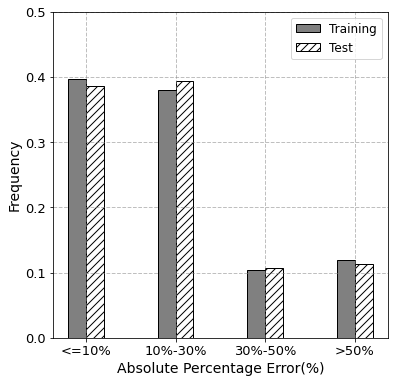

In [ ]:
fig = plt.figure(figsize = (6,6)).add_subplot(111)

plt.grid(axis='both',color='grey',linestyle='--',lw=1,alpha=0.5)
a = fig.bar(np.arange(0.08,0.68,0.2),mape_svr_train,label='Training',fc='grey',width=0.04,edgecolor='k',tick_label=['<=10%','10%-30%','30%-50%','>50%'])
b = fig.bar(np.arange(0.12,0.73,0.2),mape_svr_test,label='Test',color='white',width=0.04,edgecolor='k',hatch='///')
fig.set_xticks([0.1, 0.3, 0.5, 0.7])
fig.tick_params(axis='both',labelsize=13)
fig.set_ylim(0,0.5)
fig.set_xlabel('Absolute Percentage Error(%)',fontsize=14)
# fig.set_ylabel('Frequency',fontsize=13,rotation=90,labelpad=25)
fig.set_ylabel('Frequency',fontsize=14,rotation=90)
# fig.spines['top'].set_visible(False)
# fig.spines['right'].set_visible(False)
# fig.spines['left'].set_visible(False)
fig.legend(loc=1,fontsize=12)
plt.savefig('svr_mape.pdf')
plt.savefig('svr_mape.eps')

SVR 训练集结果

In [ ]:
y_predict = clf.predict(X_train)


rmse = sqrt(mean_squared_error(y_train,y_predict))
acc_list = [i for i in abs(y_predict-y_train)/y_train if i < 0.05]
mape = round((abs(y_predict-y_train)/abs(y_train)).mean(),4)
acc = round(len(acc_list)/len(y_train),4)

print("-----SVR训练结果\n")
print(f"-----RMSE: {rmse}, MAPE: {mape}, Accuracy: {acc}, Time: {end_time-start_time} \n")


-----GBMs训练结果

-----RMSE: 11.94651753758925, MAPE: 0.8365, Accuracy: 0.2423, Time: 17.04779164399997 



## GBDT

In [ ]:
gbrt = GradientBoostingRegressor(min_samples_split=18, max_depth=16, learning_rate=0.1)
start_time=time.process_time()
gbrt.fit(X_train, y_train)
end_time=time.process_time()

In [ ]:
gbrt.predict(X_test[0:1])[0]

66.35284937808217

In [ ]:
gbrt = GradientBoostingRegressor(min_samples_split=18, max_depth=16, learning_rate=0.1)
start_time=time.process_time()
gbrt.fit(X_train, y_train)
end_time=time.process_time()
y_predict = gbrt.predict(X_test)


rmse = sqrt(mean_squared_error(y_test,y_predict))
acc_list = [i for i in abs(y_predict-y_test)/y_test if i < 0.05]
mape = round((abs(y_predict-y_test)/abs(y_test)).mean(),4)
acc = round(len(acc_list)/len(y_test),4)
p_time = end_time - start_time

print("-----GBMs训练结果\n")
print(f"-----RMSE: {rmse}, MAPE: {mape}, Accuracy: {acc}, Time: {end_time-start_time} \n")

-----GBMs训练结果

-----RMSE: 3.489482869216374, MAPE: 0.093, Accuracy: 0.6984, Time: 18.988514676 



##### new mape

In [ ]:
df= data.values
# 归一化
# df[:,1:] = (df[:,1:]-df[:,1:].min(axis=0))/(df[:,1:].max(axis=0)-df[:,1:].min(axis=0))
X_train, X_test, y_train, y_test = train_test_split(df[:,1:],df[:,0], test_size=0.2)

In [ ]:
gbrt = GradientBoostingRegressor(min_samples_split=18, max_depth=16, learning_rate=0.1)
start_time=time.process_time()
gbrt.fit(X_train[:,:-2], y_train)
end_time=time.process_time()
y_predict = gbrt.predict(X_test[:,:-2])

In [ ]:
sqrt(mean_squared_error(y_test,y_predict))

3.0377375761748926

In [ ]:
mape_list = (abs(X_test[:,-1]-y_predict-X_test[:,-2])/X_test[:,-2])
print('mape: ',mape_list.mean())
acc_list1 = [i for i in mape_list if i < 0.03]
print('acc', round(len(acc_list1)/len(y_test),4))

mape:  0.012693494317416714
acc 0.9264


#### Visualization

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

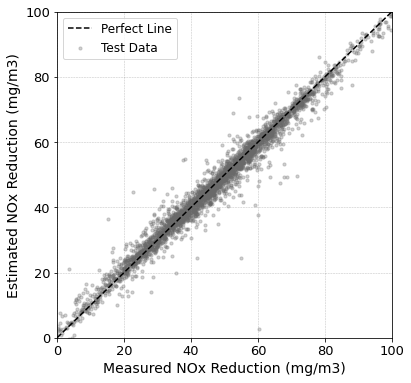

In [ ]:
fig = plt.figure(figsize=(6,6)).add_subplot(111)
fig.scatter(y_test, y_predict,10,alpha=0.3,color='dimgrey',label='Test Data')
x=[0,100]
y=[0,100]
fig.plot(x,y,color='k',linestyle='--',label='Perfect Line')
fig.set_xlabel('Measured NOx Reduction (mg/m3)',fontsize=14)
fig.set_ylabel('Estimated NOx Reduction (mg/m3)',fontsize=14)
plt.xlim(0,100)
plt.ylim(0,100)
fig.legend(loc=0,fontsize=12)
# plt.title('GBDT model',fontsize=18,pad=20)
fig.tick_params(axis='both',labelsize=13)
plt.grid(axis='both',color='grey',linestyle='--',lw=0.5,alpha=0.5)
plt.savefig('gbdt.pdf')
plt.savefig('gbdt.eps')

GBDT 训练集结果

In [ ]:
y_predict = gbrt.predict(X_train)


rmse = sqrt(mean_squared_error(y_train,y_predict))
acc_list = [i for i in abs(y_predict-y_train)/y_train if i < 0.05]
mape = round((abs(y_predict-y_train)/abs(y_train)).mean(),4)
acc = round(len(acc_list)/len(y_train),4)

print("-----GBMs训练结果\n")
print(f"-----RMSE: {rmse}, MAPE: {mape}, Accuracy: {acc}, Time: {end_time-start_time} \n")


-----GBMs训练结果

-----RMSE: 0.7111837169971097, MAPE: 0.0206, Accuracy: 0.9529, Time: 18.988514676 



In [ ]:
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0
g = 0
h = 0
for i in range(len(X_test)):
  y_predict=gbrt.predict(X_test[i].reshape(1,-1))
  mape = (abs(y_predict.squeeze()-y_test[i])/abs(y_test[i]))
  if mape <= 0.1:
    a = a+1
  elif mape >= 0.1 and mape < 0.3:
    b = b+1
  elif mape >= 0.3 and mape <0.5:
    c = c+1
  elif mape >=0.5:
    d = d+1

for i in range(len(X_train)):
  y_predict=gbrt.predict(X_train[i].reshape(1,-1))
  mape = (abs(y_predict.squeeze()-y_train[i])/abs(y_train[i]))
  if mape <= 0.1:
    e = e+1
  elif mape >= 0.1 and mape < 0.3:
    f = f+1
  elif mape >= 0.3 and mape <0.5:
    g = g+1
  elif mape >=0.5:
    h = h+1

m = (a+b+c+d)
n = (e+f+g+h)

a = a/m
b = b/m
c = c/m
d = d/m

e = e/n
f = f/n
g = g/n
h = h/n

mape_gbdt_test = [a,b,c,d]
mape_gbdt_train = [e,f,g,h]
print(mape_gbdt_train)
print(mape_gbdt_test)

[0.9834473626131097, 0.012727138968586772, 0.001471345545501361, 0.0023541528728021777]
[0.8702559576345984, 0.1009120329508679, 0.01323918799646955, 0.015592821418064137]


In [ ]:
mape_gbdt_train = [0.9825645552858089, 0.013168542632237181, 0.0019127492091517693, 0.0023541528728021777]
mape_gbdt_test = [0.8705501618122977, 0.10355987055016182, 0.01059135039717564, 0.015298617240364814]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

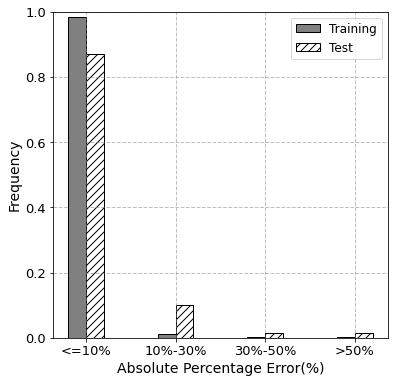

In [ ]:
fig = plt.figure(figsize = (6,6)).add_subplot(111)

plt.grid(axis='both',color='grey',linestyle='--',lw=1,alpha=0.5)
a = fig.bar(np.arange(0.08,0.68,0.2),mape_gbdt_train,label='Training',fc='grey',width=0.04,edgecolor='k',tick_label=['<=10%','10%-30%','30%-50%','>50%'])
b = fig.bar(np.arange(0.12,0.73,0.2),mape_gbdt_test,label='Test',color='white',width=0.04,edgecolor='k',hatch='///')
fig.set_xticks([0.1, 0.3, 0.5, 0.7])
fig.tick_params(axis='both',labelsize=13)
fig.set_ylim(0,1)
fig.set_xlabel('Absolute Percentage Error(%)',fontsize=14)
# fig.set_ylabel('Frequency',fontsize=13,rotation=90,labelpad=25)
fig.set_ylabel('Frequency',fontsize=14,rotation=90)
# fig.spines['top'].set_visible(False)
# fig.spines['right'].set_visible(False)
# fig.spines['left'].set_visible(False)
fig.legend(loc=1,fontsize=12)
plt.savefig('gbdt_mape.eps')
plt.savefig('gbdt_mape.pdf')

### Tuning

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NOx-216.csv',index_col='Time')
df= data.values
df[:,1:] = (df[:,1:]-df[:,1:].min(axis=0))/(df[:,1:].max(axis=0)-df[:,1:].min(axis=0))
X_train, X_test, y_train, y_test = train_test_split(df[:,1:],df[:,0], test_size=0.2)

def gridsearch(a,b):
    gbrt = GradientBoostingRegressor(min_samples_split=a, max_depth=b, learning_rate=0.1)
    start_time=time.process_time()
    gbrt.fit(X_train, y_train)
    end_time=time.process_time()
    y_predict = gbrt.predict(X_test)


    rmse = sqrt(mean_squared_error(y_test,y_predict))
    acc_list = [i for i in abs(y_predict-y_test)/y_test if i < 0.05]
    mape = round((abs(y_predict-y_test)/abs(y_test)).mean(),4)
    acc = round(len(acc_list)/len(y_test),4)
    p_time = end_time - start_time
    
    print(a,b,rmse)

    return rmse, mape, acc, p_time

Grid Search

In [ ]:
grid = {'min_samples_split':[2,3,4,5,6,7,8,9,10,12,14,16,18,20,25,30], 'max_depth': [10,11,12,13,14,15,16,17,18,19,20,25,30]}
l = len(grid['max_depth'])

In [ ]:
result=[]
for i in grid['min_samples_split']:
    for j in grid['max_depth']:
        result.append(gridsearch(int(i),int(j)))

2 10 3.570689985304874
2 11 3.2533846962123945
2 12 3.0048552514190474
2 13 2.8319971527317893
2 14 2.794159283639858
2 15 2.8001399423306506
2 16 2.9012431146861406
2 17 3.0488350307376133
2 18 3.1836248311227915
2 19 3.2626657424561816
2 20 3.401258637263119
2 25 3.7668630765711195
2 30 3.856492318733442
3 10 3.801221513851771
3 11 3.213497870302717
3 12 3.0038431396471927
3 13 2.8037542112396734
3 14 2.7962815989965084
3 15 2.6958727007815977
3 16 2.85898352570916
3 17 2.999661943208387
3 18 3.071807804467297
3 19 3.193084082736472
3 20 3.2859241693392316
3 25 3.5969767340987664
3 30 3.689085954582677
4 10 3.615084050981458
4 11 3.2939642218050977
4 12 2.9442260080841867
4 13 2.8198517349502286
4 14 2.7066973052611267
4 15 2.7445029254954476
4 16 2.965023728969424
4 17 3.0609659629149126
4 18 3.0418218968560935
4 19 3.131536501607754
4 20 3.14890874994557
4 25 3.436278947394138
4 30 3.466871963090115
5 10 3.720196198111089
5 11 3.248215044821306
5 12 2.9675574292410127
5 13 2.875816

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


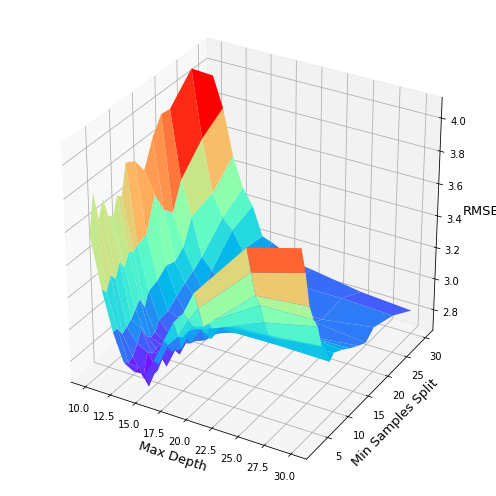

In [ ]:
rmse = []
for i in range(len(result)):
    rmse.append(result[i][0])

rmse_np = []
for i in range(len(result)):
    if (i+1) % l == 0:
        rmse_np.append(rmse[i-l+1:i+1])

fig = plt.figure(figsize = (7,7))  #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')

#定义三维数据
yy = grid['min_samples_split']
xx = grid['max_depth']
X, Y = np.meshgrid(xx, yy)
Z = np.array(rmse_np)

#作图
ax3.plot_surface(X,Y,Z,cmap='rainbow')

ax3.set_ylabel('Min Samples Split',fontsize=13)
ax3.set_xlabel('Max Depth',fontsize=13)
ax3.set_zlabel('RMSE',fontsize=13,labelpad=10)

plt.tight_layout()
plt.savefig('gbdt_rmse.eps')
plt.show()

In [ ]:
time1 = []
for i in range(len(result)):
    time1.append(result[i][3])
    
time_np = []
for i in range(len(result)):
    if (i+1) % l == 0:
        time_np.append(time1[i-l+1:i+1])
        
fig = plt.figure(figsize = (7,7))  #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')

#定义三维数据
yy = grid['min_samples_split']
xx = grid['max_depth']
X, Y = np.meshgrid(xx, yy)
Z = np.array(time_np)

#作图
ax3.plot_surface(X,Y,Z,cmap='rainbow')
ax3.set_ylabel('Min Samples Split',fontsize=13)
ax3.set_xlabel('Max Depth',fontsize=13)
ax3.set_zlabel('TIME',fontsize=13,labelpad=10)


plt.show()

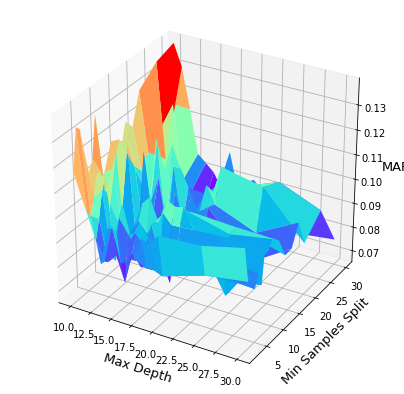

In [ ]:
mape = []
for i in range(len(result)):
    mape.append(result[i][1])
    
mape_np = []
for i in range(len(result)):
    if (i+1) % l == 0:
        mape_np.append(mape[i-l+1:i+1])
        
fig = plt.figure(figsize = (7,7))  #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')

#定义三维数据
yy = grid['min_samples_split']
xx = grid['max_depth']
X, Y = np.meshgrid(xx, yy)
Z = np.array(mape_np)

#作图
ax3.plot_surface(X,Y,Z,cmap='rainbow')

ax3.set_ylabel('Min Samples Split',fontsize=13)
ax3.set_xlabel('Max Depth',fontsize=13)
ax3.set_zlabel('MAPE',fontsize=13,labelpad=10)

plt.show()

In [ ]:
acc = []
for i in range(len(result)):
    acc.append(result[i][2])
    
acc_np = []
for i in range(len(result)):
    if (i+1) % l == 0:
        acc_np.append(acc[i-l+1:i+1])
        
fig = plt.figure(figsize = (7,7))  #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')

#定义三维数据
yy = grid['min_samples_split']
xx = grid['max_depth']
X, Y = np.meshgrid(xx, yy)
Z = np.array(acc_np)

#作图
ax3.plot_surface(X,Y,Z,cmap='rainbow')

ax3.set_ylabel('min samples split',fontsize=13)
ax3.set_xlabel('max depth',fontsize=13)
ax3.set_zlabel('ACC',fontsize=13)


plt.show()

## LSTM

In [ ]:
data.describe()

,reduced NOx,ammonia hydroxide flow,furnace temperature,furnace steam flow - day,CO concentration in exhaust smoke,furnace steam flow - night,actual feed quantity,SO2 concentration in exhaust smoke,furnace temperature - left,flue gas outlet temperature,CO concentration in boiler,boiler drum pressure 2
count,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000
mean,47.100525,0.169433,0.439034,0.735088,0.060369,0.236823,0.484148,0.253480,0.451852,0.525417,0.003526,0.342399
std,20.084120,0.120351,0.242497,0.300927,0.123126,0.312342,0.276489,0.189557,0.217063,0.210374,0.027167,0.195486
min,-28.436160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.462522,0.102981,0.317172,0.525577,0.005742,0.000000,0.255599,0.100521,0.298845,0.405504,0.000139,0.215337
50%,47.128065,0.122855,0.407303,0.941995,0.016371,0.028522,0.512067,0.209490,0.437538,0.591884,0.000139,0.277323
75%,59.691102,0.164408,0.587021,0.944251,0.056507,0.448161,0.694122,0.352950,0.598042,0.673099,0.001391,0.404566
max,135.273470,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size]) 
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [ ]:
df= data.values
TRAIN_SPLIT = int(len(df)*0.8)
past_history = 18
future_target = 1
STEP = 1
name = 'regression.csv'


x_single, y_single = multivariate_data(df[:,1:], df[:, 0], 0,
                                      None, past_history,
                                      future_target, STEP,
                                      single_step=True)

randnum = random.randint(0,len(df))
random.seed(randnum)
random.shuffle(x_single)
random.seed(randnum)
random.shuffle(y_single)

x_train_single = x_single[:TRAIN_SPLIT]
y_train_single = y_single[:TRAIN_SPLIT]
x_val_single = x_single[TRAIN_SPLIT:]
y_val_single = y_single[TRAIN_SPLIT:]

BATCH_SIZE = 128
BUFFER_SIZE = x_train_single.shape[0]

train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
#from_tensor_slices把给定的元组、列表和张量等数据进行特征切片
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
#shuffle 将数据打乱

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

single_step_model = Sequential([LSTM(128,input_shape=x_train_single.shape[-2:], return_sequences=True),
                                Conv1D(32,3),
                                LSTM(64),
                                Dense(64, input_shape=x_train_single.shape[-2:], kernel_regularizer = regularizers.l2(1e-5), activation='relu'),
                                BatchNormalization(),
                                Dense(32, kernel_regularizer = regularizers.l2(1e-5), activation='relu'),
                                Dense(1)])

print(single_step_model.summary())

single_step_model.compile(optimizer='Adam', loss='mae')

EVALUATION_INTERVAL = x_train_single.shape[0]// BATCH_SIZE
EPOCHS = 50

checkpoint_best_path = os.path.join('checkpoints_best_only/LSTM_Single_checkpoint',name)
checkpoint_best = ModelCheckpoint(filepath=checkpoint_best_path,
                                  save_weights_only=True,
                                  save_freq='epoch',
                                  monitor='val_loss',
                                  save_best_only=True,
                                  verbose=1)

# early_stopping = EarlyStopping(monitor = 'loss', patience=3)
# callbacks = [checkpoint_best, early_stopping]
callbacks = [checkpoint_best]

start_time=time.process_time()
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=x_val_single.shape[0]//BATCH_SIZE,
                                            callbacks=callbacks,
                                            verbose=2)
end_time=time.process_time()
history = pd.DataFrame(single_step_history.history)

single_step_model.load_weights(checkpoint_best_path)
save_name ='LSTM_时序_统一标准化_Steps18_Adam_'+ name[:-4]+'.h5'
single_step_model.save(save_name)

y_predict = single_step_model.predict(x_val_single)
y_predict = y_predict.squeeze()
acc_list = [i for i in abs(y_predict-y_val_single)/y_val_single if i < 0.05]
rmse = sqrt(mean_squared_error(y_val_single,y_predict))

acc_list = [i for i in abs(y_predict-y_val_single)/y_val_single if i < 0.01]
mape = round((abs(y_predict-y_val_single)/abs(y_val_single)).mean(),4)
acc = round(len(acc_list)/len(y_val_single),4)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 18, 128)           71680     
                                                                 
 conv1d (Conv1D)             (None, 16, 32)            12320     
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                        

In [ ]:
print("-----LSTM训练结果\n")
print(f"-----RMSE: {rmse}, MAPE: {mape}, Accuracy: {acc}, Time: {end_time-start_time}\n")
# draw_plot(y_val_single.squeeze(), y_predict,'Results for LSTM on Test Data-Time Series','Error for LSTM on Test Data-Time Series')

-----LSTM训练结果

-----RMSE: 16.99804202968458, MAPE: 0.7669, Accuracy: 0.0322, Time: 643.979131404



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

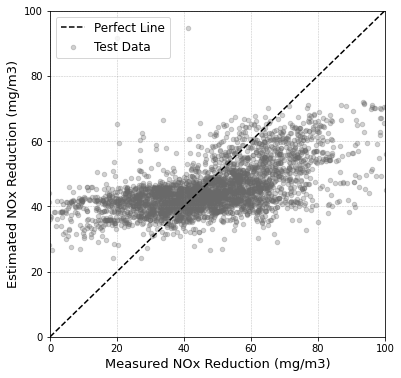

In [ ]:
fig = plt.figure(figsize=(6,6)).add_subplot(111)
fig.scatter(y_val_single.squeeze(), y_predict,20,alpha=0.3,color='dimgrey',label='Test Data')
x=[0,100]
y=[0,100]
fig.plot(x,y,color='k',linestyle='--',label='Perfect Line')
fig.set_xlabel('Measured NOx Reduction (mg/m3)',fontsize=13)
fig.set_ylabel('Estimated NOx Reduction (mg/m3)',fontsize=13)
plt.xlim(0,100)
plt.ylim(0,100)
fig.legend(loc=2,fontsize=12)
# plt.title('LSTM model',fontsize=18,pad=20)
plt.grid(axis='both',color='grey',linestyle='--',lw=0.5,alpha=0.5)
plt.savefig('lstm.pdf')
plt.savefig('lstm.eps')

In [ ]:
y_predict = single_step_model.predict(x_val_single)
y_predict = y_predict.squeeze()
acc_list = [i for i in abs(y_predict-y_val_single)/y_val_single if i < 0.05]
rmse = sqrt(mean_squared_error(y_val_single,y_predict))

acc_list = [i for i in abs(y_predict-y_val_single)/y_val_single if i < 0.01]
mape = round((abs(y_predict-y_val_single)/abs(y_val_single)).mean(),4)
acc = round(len(acc_list)/len(y_val_single),4)

In [ ]:
y_predict = single_step_model.predict(x_train_single)
y_predict = y_predict.squeeze()
acc_list = [i for i in abs(y_predict-y_train_single)/y_train_single if i < 0.05]
rmse = sqrt(mean_squared_error(y_train_single,y_predict))

acc_list = [i for i in abs(y_predict-y_train_single)/y_train_single if i < 0.01]
mape = round((abs(y_predict-y_train_single)/abs(y_train_single)).mean(),4)
acc = round(len(acc_list)/len(y_train_single),4)
print("-----LSTM训练结果\n")
print(f"-----RMSE: {rmse}, MAPE: {mape}, Accuracy: {acc}, Time: {end_time-start_time}\n")
# draw_plot(y_val_single.squeeze(), y_predict,'Results for LSTM on Test Data-Time Series','Error for LSTM on Test Data-Time Series')

-----LSTM训练结果

-----RMSE: 19.48608543299277, MAPE: 1.4279, Accuracy: 0.0301, Time: 643.979131404



In [ ]:
x_val_single[0].shape

(18, 11)

In [ ]:
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0
g = 0
h = 0
for i in range(len(x_val_single)):
  y_predict=single_step_model.predict(x_val_single[i].reshape(-1,18,11))
  mape = (abs(y_predict.squeeze()-y_val_single[i])/abs(y_val_single[i]))
  if mape <= 0.1:
    a = a+1
  elif mape >= 0.1 and mape < 0.3:
    b = b+1
  elif mape >= 0.3 and mape <0.5:
    c = c+1
  elif mape >=0.5:
    d = d+1

for i in range(len(x_train_single)):
  y_predict=single_step_model.predict(x_train_single[i].reshape(-1,18,11).reshape(-1,18,11))
  mape = (abs(y_predict.squeeze()-y_train_single[i])/abs(y_train_single[i]))
  if mape <= 0.1:
    e = e+1
  elif mape >= 0.1 and mape < 0.3:
    f = f+1
  elif mape >= 0.3 and mape <0.5:
    g = g+1
  elif mape >=0.5:
    h = h+1

m = (a+b+c+d)
n = (e+f+g+h)

a = a/m
b = b/m
c = c/m
d = d/m

e = e/n
f = f/n
g = g/n
h = h/n

mape_lstm_test = [a,b,c,d]
mape_lstm_train = [e,f,g,h]
print(mape_lstm_train)
print(mape_lstm_test)

[0.23688663282571912, 0.3695284337526668, 0.17391304347826086, 0.2196718899433532]
[0.27218934911242604, 0.4029585798816568, 0.13579881656804735, 0.18905325443786983]


In [ ]:
mape_lstm_train = [0.23688663282571912, 0.3695284337526668, 0.17391304347826086, 0.2196718899433532]
mape_lstm_test = [0.27218934911242604, 0.4029585798816568, 0.13579881656804735, 0.18905325443786983]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

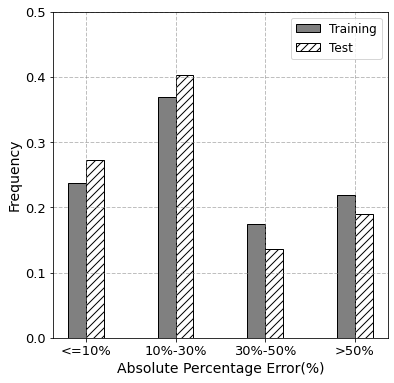

In [ ]:
fig = plt.figure(figsize = (6,6)).add_subplot(111)

plt.grid(axis='both',color='grey',linestyle='--',lw=1,alpha=0.5)
a = fig.bar(np.arange(0.08,0.68,0.2),mape_lstm_train,label='Training',fc='grey',width=0.04,edgecolor='k',tick_label=['<=10%','10%-30%','30%-50%','>50%'])
b = fig.bar(np.arange(0.12,0.73,0.2),mape_lstm_test,label='Test',color='white',width=0.04,edgecolor='k',hatch='///')
fig.set_xticks([0.1, 0.3, 0.5, 0.7])
fig.tick_params(axis='both',labelsize=13)
fig.set_ylim(0,0.5)
fig.set_xlabel('Absolute Percentage Error(%)',fontsize=14)
# fig.set_ylabel('Frequency',fontsize=13,rotation=90,labelpad=25)
fig.set_ylabel('Frequency',fontsize=14,rotation=90)
# fig.spines['top'].set_visible(False)
# fig.spines['right'].set_visible(False)
# fig.spines['left'].set_visible(False)
fig.legend(loc=1,fontsize=12)
plt.savefig('lstm_mape.eps')
plt.savefig('lstm_mape.pdf')

# Interpretation

In [ ]:
!pip install shap
import shap

     |████████████████████████████████| 564 kB 5.0 MB/s 


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NOx-216.csv',index_col='Time')

In [ ]:
data.describe()

,Reduced NOx,Ammonia Flow,Furnace Temperature,Furnace Steam Flow - Day,CO Concentration in Exhaust Smoke,Furnace Steam flow - Night,Actual Feed Quantity,SO2 Concentration in Exhaust Smoke,Furnace Temperature - Left,Flue Gas Outlet Temperature,CO Concentration in Boiler,Boiler Drum Pressure 2
count,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000,16992.000000
mean,47.100525,0.169433,0.439034,0.735088,0.060369,0.236823,0.484148,0.253480,0.451852,0.525417,0.003526,0.342399
std,20.084120,0.120351,0.242497,0.300927,0.123126,0.312342,0.276489,0.189557,0.217063,0.210374,0.027167,0.195486
min,-28.436160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.462522,0.102981,0.317172,0.525577,0.005742,0.000000,0.255599,0.100521,0.298845,0.405504,0.000139,0.215337
50%,47.128065,0.122855,0.407303,0.941995,0.016371,0.028522,0.512067,0.209490,0.437538,0.591884,0.000139,0.277323
75%,59.691102,0.164408,0.587021,0.944251,0.056507,0.448161,0.694122,0.352950,0.598042,0.673099,0.001391,0.404566
max,135.273470,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:],data.iloc[:,0], test_size=0.2)

In [ ]:
gbrt = GradientBoostingRegressor(min_samples_split=16, max_depth=18, learning_rate=0.1)
start_time=time.process_time()
gbrt.fit(X_train, y_train)
end_time=time.process_time()
y_predict = gbrt.predict(X_test)

rmse = sqrt(mean_squared_error(y_test,y_predict))
acc_list = [i for i in abs(y_predict-y_test)/y_test if i < 0.05]
mape = round((abs(y_predict-y_test)/y_test).mean(),4)
acc = round(len(acc_list)/len(y_test),4)
p_time = end_time - start_time
print(rmse, mape, acc, p_time)

3.2759801181393784 0.0474 0.7432 13.949298838999999


In [ ]:
rmse = sqrt(mean_squared_error(y_train,gbrt.predict(X_train)))
acc_list = [i for i in abs(gbrt.predict(X_train)-y_train)/y_train if i < 0.05]
mape = round((abs(gbrt.predict(X_train)-y_train)/abs(y_train)).mean(),4)
acc = round(len(acc_list)/len(y_train),4)
p_time = end_time - start_time
print(rmse, mape, acc, p_time)

0.5054546553590776 0.0139 0.9759 15.433121306000004


In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(gbrt, X_train)
# Calculate Shap values
shap_values = explainer.shap_values(X_train)

100%|===================| 13583/13593 [05:06<00:00]       

In [ ]:
X_train

,ammonia hydroxide flow,furnace temperature,furnace steam flow - day,CO concentration in exhaust smoke,furnace steam flow - night,actual feed quantity,SO2 concentration in exhaust smoke,furnace temperature - left,flue gas outlet temperature,CO concentration in boiler,boiler drum pressure 2
Time,,,,,,,,,,,
2021-07-21 19:50:01,0.350497,0.433407,0.898519,0.107269,0.000000,0.447007,0.202569,0.461695,0.788739,0.000695,0.259377
2021-07-22 02:22:10,0.149955,0.458727,0.944251,0.119365,0.492005,0.700545,0.359106,0.504003,0.648438,0.011982,0.398043
2021-07-22 17:16:01,0.084914,0.169509,0.695539,0.002294,0.000000,0.350775,0.179879,0.252546,0.458104,0.000070,0.270797
2021-07-23 12:26:11,0.166215,0.412837,0.324809,0.002213,0.000000,0.107844,0.204288,0.587792,0.659559,0.000139,0.641110
2021-07-22 01:45:41,0.253839,0.433407,0.944251,0.011248,0.440420,0.660363,0.278332,0.475175,0.597684,0.000765,0.249592
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-22 08:18:50,0.122855,0.610006,0.944251,0.053748,0.987158,0.962054,0.371270,0.460767,0.281580,0.000139,0.176181
2021-07-22 21:55:01,0.000000,0.022849,0.941995,0.000056,0.120589,0.550710,0.058938,0.010598,0.641187,0.000070,0.293638
2021-07-22 08:23:50,0.124661,0.610006,0.944251,0.049309,0.994210,0.000000,0.389494,0.453797,0.269049,0.000695,0.243067


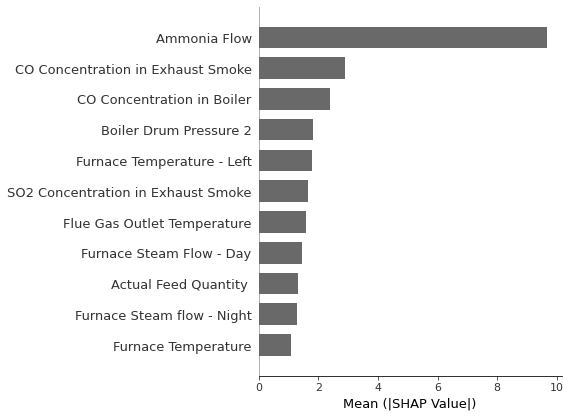

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar",show=False,color='dimgrey')
# plt.xlabel('Mean (|SHAP Value|) (Average Impact on Model Output Magnitude)')
plt.xlabel('Mean (|SHAP Value|)')
plt.tight_layout()
# plt.savefig('SHAP1.eps', format='eps', dpi=500, bbox_inches='tight')
plt.savefig('SHAP1.pdf')

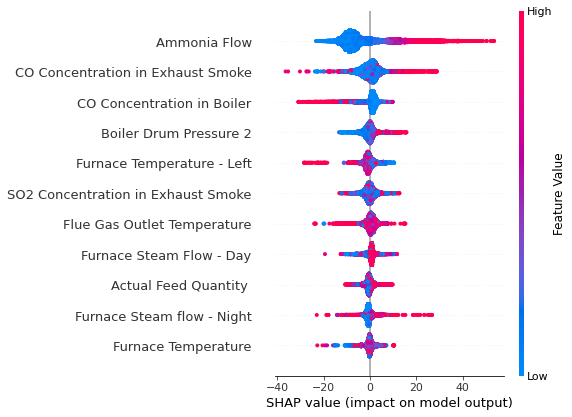

In [ ]:
shap.summary_plot(shap_values, X_train, color_bar_label='Feature Value',show=False)
# plt.xlabel('SHAP Value (Impact on Model Output)')
plt.tight_layout()
#plt.savefig('SHAP2.eps', format='eps', dpi=300, bbox_inches='tight')
plt.savefig('SHAP2.pdf')

In [ ]:
shap_values[0]

array([14.87608341,  1.82098886, -2.24576421,  0.82715554, -1.04564601,
       -0.24365086, -0.1573655 , -0.53138511,  0.436212  ,  0.67304926,
       -0.24401788])

In [ ]:
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

Explainer expected value: 48.595296680127994


In [ ]:
select = range(20)
features = X_test.iloc[select]
features_display = X_train.loc[features.index]

In [ ]:
shap.decision_plot(expected_value, shap_values[200:270], X_train[200:270],show=False)
# plt.xlabel('Model Output Value')
plt.tight_layout()
# plt.savefig('SHAP3.eps', format='eps', dpi=300, bbox_inches='tight')
plt.savefig('SHAP3.pdf')

In [ ]:
import xgboost
import shap

# train XGBoost model
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)

# Yellowbrick

In [ ]:
!pip install yellowbrick

     |████████████████████████████████| 274 kB 15.1 MB/s 


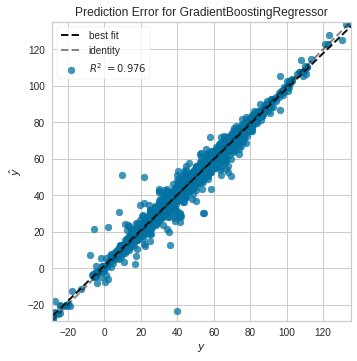

In [ ]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
model = GradientBoostingRegressor(min_samples_split=16, max_depth=18, learning_rate=0.1)

visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()   

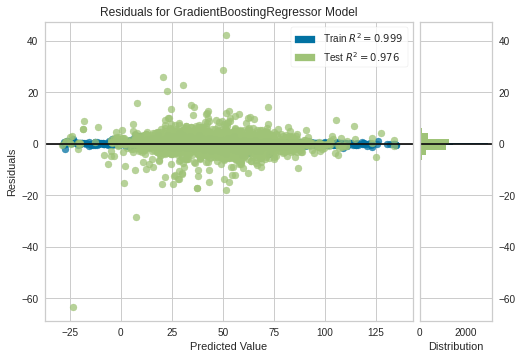

In [ ]:
from yellowbrick.regressor import ResidualsPlot

model = GradientBoostingRegressor(min_samples_split=16, max_depth=18, learning_rate=0.1)
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [ ]:
visualizer.finalize()

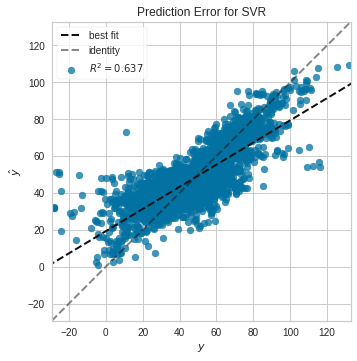

In [ ]:
# Instantiate the linear model and visualizer
model = SVR(C=512,epsilon=0.0001)

visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

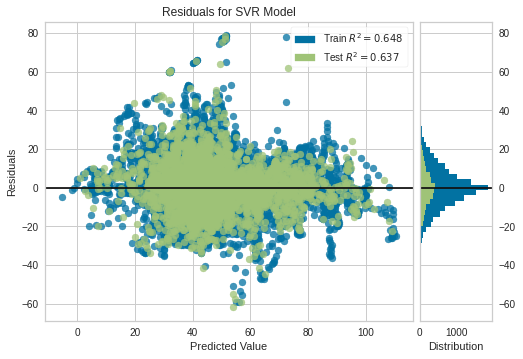

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()